# load libraries

In [143]:
from google.colab import drive
drive.mount('/content/drive')
#!pip install shap
#!pip install pyitlib
import os
os.path.abspath(os.getcwd())
os.chdir('/content/drive/My Drive/Protein project')
os.path.abspath(os.getcwd())

import warnings
warnings.filterwarnings("ignore")
from __future__ import division ###for float operation
from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score ##tp / (tp + fn)
from sklearn.metrics import precision_score #tp / (tp + fp)
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import KFold, StratifiedKFold
#from pyitlib import discrete_random_variable as drv
import time 
import timeit 
import networkx as nx
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted ### Checks if the estimator is fitted by verifying the presence of fitted attributes (ending with a trailing underscore)
from sklearn.linear_model import LogisticRegression
#from sklearn.utils.multiclass import unique_labels, not necessary, can be replaced by array(list(set()))
from sklearn import preprocessing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### P450

In [0]:
def readData(filename):
	fr = open(filename)
	returnData = []
	headerLine=fr.readline()###move cursor 
	for line in fr.readlines():
		lineStrip = line.strip().replace('"','')
		lineList =	lineStrip.split('\t')
		returnData.append(lineList)###['3','2',...]
	return returnData

"""first case P450 = [['1','1',....],[],[].....,[]]  second case P450 = array([['1','1',....],[],[].....,[]]), third case P450 = """
P450 = readData('P450.txt') ### [[],[],[],....[]]
P450 = np.array(P450) ### either [['1','1',....],[],[].....,[]] or array([['1','1',....],[],[].....,[]]) works, but note that keys are '1', '0' 
#P450 = P450.astype(int) ### for shap array [[1,1,....],[],[].....,[]], keys are 1, 0 

M=np.matrix([[245,   9,   0,   3,   0,   2,  65,   8],
[9, 218,  17,  17,  49,  10,  50,  17],
[0,  17, 175,  16,  25,  13,   0,  46],
[3,  17,  16, 194,  19,   0,   0,   3],
[0,  49,  25,  19, 199,  10,   0,   3],
[2,  10,  13,   0,  10, 249,  50,  74],
[65,  50,   0,   0,   0,  50, 262,  11],
[8,  17,  46,   3,   3,  74,  11, 175]])

X = P450[:,0:8]
y = P450[:,-1]

##### lactamase

In [0]:
def readData2(filename):
	fr = open(filename)
	returnData = []
	headerLine=fr.readline()###move cursor 
	for line in fr.readlines():
		linestr = line.strip().replace(', ','')
		lineList =	list(linestr)
		returnData.append(lineList)###['3','2',...]
	return returnData

lactamase = readData2('lactamase.txt')
lactamase = np.array(lactamase)
#lactamase = lactamase.astype(int)
M2 = np.matrix([[101, 5, 0, 2, 0, 14, 4, 37],
[5 ,15, 14 ,1 ,7 ,7, 0 ,19],
[0, 14, 266, 15, 14, 2, 26, 4],
[2, 1, 15, 28, 2 ,15, 4, 0],
[0, 7, 14, 2, 32, 9 ,0, 8],
[14, 7, 2 ,15, 9, 29, 7, 9],
[4, 0, 26, 4 ,0 ,7 ,72, 21],
[37, 19, 4, 0, 8, 9, 21, 211]])

X2 = lactamase[:,0:8]
y2 = lactamase[:,-1]

##### lymph

In [0]:
def readarff(filename):
  arrfFile = open(filename)
  lines = [line.rstrip('\n') for line in arrfFile]
  data = [[]]
  index = 0
  for line in lines :
      if(line.startswith('@attribute')) :
          index+=1
      elif(not line.startswith('@data') and not line.startswith('@relation') and not line.startswith('%')) :
          data.append(line.split(','))
  del data[0]
  return data


lymph_train = readarff("github_bn_code/lymph_train.arff.txt"); lymph_train = np.array(lymph_train)  
lymph_test = readarff("github_bn_code/lymph_test.arff.txt") ;lymph_test = np.array(lymph_test)

lymph = np.concatenate((lymph_train,lymph_test))

X10 = lymph[:,0:18]
y10 = lymph[:,-1]

##### vote

In [0]:
vote_train = readarff("github_bn_code/vote_train.arff.txt") ;vote_train = np.array(vote_train)
vote_test = readarff("github_bn_code/vote_test.arff.txt")  ; vote_test = np.array(vote_test)

vote = np.concatenate((vote_train,vote_test))
X11 = vote[:,0:16]
y11 = vote[:,-1]

##### german

In [0]:
def readData3(filename):
	fr = open(filename)
	returnData = []
	for line in fr.readlines():
		lineList = line.strip().split(' ')
		returnData.append(lineList)###['3','2',...]
	return returnData

german = readData3("data folder/german.data")
german = np.array(german)

X15 = german[:,0:20]
y15 = german[:,-1] 

##### nurse

In [0]:
def readData3(filename):
	fr = open(filename)
	returnData = []
	for line in fr.readlines():
		lineList = line.strip().split(',')
		returnData.append(lineList)###['3','2',...]
	return returnData

nurse = readData3("data folder/nursery.data")
nurse.pop()
nurse = np.array(nurse)

X3 = nurse[:,0:8]
y3 = nurse[:,-1] 

In [0]:
import pandas as pd
pd.Series(y3).value_counts()

##### car

In [0]:
def readData4(filename):
	fr = open(filename)
	returnData = []
	for line in fr.readlines():
		lineList = line.strip().split(',')
		returnData.append(lineList)###['3','2',...]
	return returnData

car = readData4("data folder/car.data")
car = np.array(car)
X6 = car[:,0:6]
y6 = car[:,-1] 

In [0]:
import pandas as pd
pd.Series(y6).value_counts()
set(y6)

{'acc', 'good', 'unacc', 'vgood'}

# generate PU data

In [0]:
class PUgenerator:
  """ Generate PU data from fully labeled data set.
      Labelling assumption: SCAR, i.e, e(x) = P(s=1|y=1,x) = p(s=1|y=1) = c
      Scenarios: case_control or single-training
  """
  def __init__(self):
      pass

  def fit(self,X,y, case_control = True, n_L = None,n_U = None,  c = None,n_T = None, random_state = 42, pos_label = '1'):
    """ Implementation of a fitting function.
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input samples.
        y : array-like, shape (n_samples,) or (n_samples, n_outputs)
            The target values (class labels in classification, real numbers in
            regression).
        n_L : Scalar
              Number of labeled examples, for case_control = T
        n_U : Scalar
              Number of Unlabeled examples, for case_control = T
        random_state : Scalar
                        set seed for Pu data generation
        pos_label : default is '1'.
                    make other labels be '0'.
        case_control : Bool
                      Case control scenario or single training data scenario
        c : scalar
            P(s=1|y=1), only needed when case_control = F
        n_T : scalar
            Sample size of single training dataset, for case_control = F
        Returns
        -------
        self
      """
    # print("just arrived in the fit function--",id(X))
    X,y = check_X_y(X,y)
    y = y.astype(str)
    # f(x) = alpha f+(x) + (1-alpha) f-(x), true population
    data = np.concatenate((X, y.reshape(-1,1)), axis=1) 
    np.random.seed(random_state*3) # set seed for random
    np.random.shuffle(data) # save memory space than permutation, since no copy needed
    # print("after check_X_y --",id(X))
    n,p = X.shape
    # f+(x)
    X_1_true = data[data[:,-1] == pos_label ,0:p]
    
    # case control scenario
    if case_control: 
      # sample labeled positive from f+(x)
      np.random.seed(random_state) # set seed for np.random
      row_inx_L = np.random.choice(X_1_true.shape[0], n_L,replace=True)
      X_labeled = X_1_true[row_inx_L,:]
      # sample unlabeled X from f(x)
      np.random.seed(random_state*2)
      row_inx_U = np.random.choice(n, n_U,replace=True) # set seed for np.random
      X_Unlabeled = data[row_inx_U,0:p]
      y_Unlabeled = data[row_inx_U,-1]
      y_Unlabeled = np.where(y_Unlabeled == pos_label,'1','0')
      self.X_1abeled_ , self.X_Unlabeled_, self.prevalence_ ,self.X_true_, self.X_1_true_, self.p_, self.y_Unlabeled_ = X_labeled,X_Unlabeled, X_1_true.shape[0]/n, X, X_1_true, p, y_Unlabeled
    
    else: 
      # sample single training data.
      np.random.seed(random_state*2)
      row_inx_Total = np.random.choice(n, n_T,replace=True) # set seed for np.random
      data_T = data[row_inx_Total,:] # data_T is single training set
      data_T_P = data_T[data_T[:,-1] == pos_label ,:]
      data_T_N = data_T[data_T[:,-1] != pos_label ,:]
      # sample positive labeled.
      np.random.seed(random_state) # set seed for np.random
      row_inx_L = np.random.choice(data_T_P.shape[0],int(data_T_P.shape[0]*c) ,replace=False)
      data_T_P_L = data_T_P[row_inx_L,:]
      data_T_P_U = data_T_P[list(set(range(data_T_P.shape[0])).difference(row_inx_L) ) ]
      # Unlabeled = data_T_P_U + data_T_N
      data_T_U = np.concatenate((data_T_P_U,data_T_N), axis = 0)
      X_Unlabeled = data_T_U[:,0:p]
      y_Unlabeled = data_T_U[:,-1]
      y_Unlabeled = np.where(y_Unlabeled == pos_label,'1','0')
      self.X_1abeled_, self.X_Unlabeled_, self.X_T_, self.prevalence_, self.X_true_, self.X_1_true_,self.p_, self.y_Unlabeled_ = data_T_P_L[:,0:p], X_Unlabeled, data_T[:,0:p], X_1_true.shape[0]/n, X ,X_1_true, p, y_Unlabeled 
      # X_T_ 
    self.case_control_ = case_control
    return self

  def value_count(self):
    # x_labeled vs x_1_true,  
    # x_T or x_Unlabeled vs X_true_
    X_L = pd.DataFrame(self.X_1abeled_) # fl(x)
    X_1_true = pd.DataFrame(self.X_1_true_) # f+(x)
    X_true = pd.DataFrame(self.X_true_) # f(x)
    if self.case_control_:
      XU_or_XT = pd.DataFrame(self.X_Unlabeled_) # fU(x) or fT(x)
    else:
      XU_or_XT = pd.DataFrame(self.X_T_)

    X_true_count = X_true.apply(pd.Series.value_counts)
    X_L_count = X_L.apply(pd.Series.value_counts)
    X_1_true_count = X_1_true.apply(pd.Series.value_counts)
    XU_or_XT_count = XU_or_XT.apply(pd.Series.value_counts)

    return X_true_count,X_L_count,XU_or_XT_count,X_1_true_count

  def plot_dist(self):
    X_true_count,X_L_count,XU_or_XT_count,X_1_true_count = self.value_count()
    # x_T or x_Unlabeled vs X_true_
    X_true_count.apply(lambda x: 100 * x / x.sum() ).plot(kind='bar',subplots=True,layout=(int(self.p_/2), 2),title = "Population, f(x)",sharex = False)
    if self.case_control_:
      XU_or_XT_count.apply(lambda x: 100 * x / x.sum() ).plot(kind='bar',subplots=True,layout=(int(self.p_/2), 2),title = "Unlabeled, f(x|s=0)",sharex = False)
    else:
      XU_or_XT_count.apply(lambda x: 100 * x / x.sum() ).plot(kind='bar',subplots=True,layout=(int(self.p_/2), 2),title = "Single-training, f(x)",sharex = False)
    # x_labeled vs x_1_true,
    X_1_true_count.apply(lambda x: 100 * x / x.sum() ).plot(kind='bar',subplots=True,layout=(int(self.p_/2), 2),title = "Positive population, f(x|y=1)",sharex = False)
    X_L_count.apply(lambda x: 100 * x / x.sum() ).plot(kind='bar',subplots=True,layout=(int(self.p_/2), 2),title = "Labeled, f(x|s=1)",sharex = False)
    



#### vote

In [0]:
X11.shape

(435, 16)

In [0]:
X11

array([["'n'", "'y'", "'n'", ..., "'y'", "'n'", "'y'"],
       ["'n'", "'y'", "'n'", ..., "'y'", "'n'", "'n'"],
       ['n', "'y'", "'y'", ..., "'y'", "'n'", "'n'"],
       ...,
       ["'n'", "'n'", "'n'", ..., "'y'", "'n'", "'y'"],
       ["'n'", "'n'", "'n'", ..., "'y'", "'n'", "'y'"],
       ["'n'", "'y'", "'n'", ..., "'y'", "'n'", "'n'"]], dtype='<U12')

In [0]:
vote_pu = PUgenerator()
vote_pu.fit(X11,y11,n_L = 100,n_U =300,pos_label = "'republican'" )
vote_pu.prevalence_

0.38620689655172413

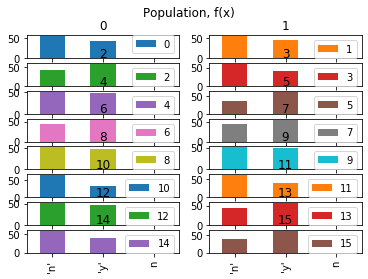

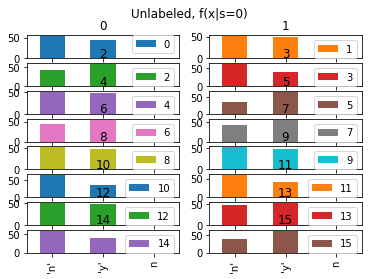

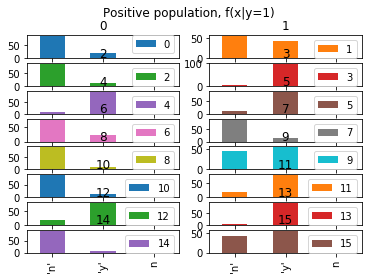

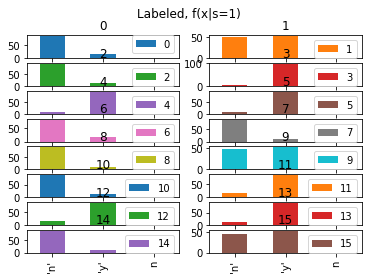

In [0]:
vote_pu.plot_dist()

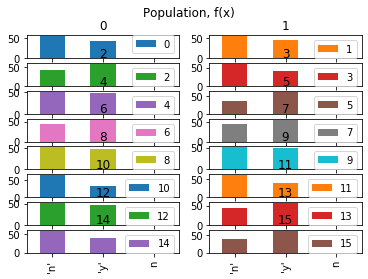

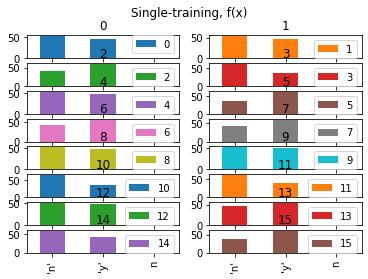

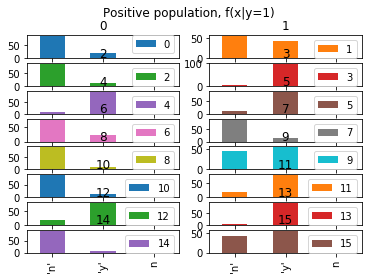

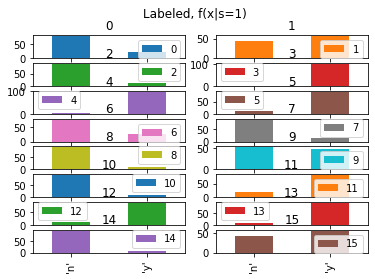

In [0]:
vote_pu = PUgenerator()
vote_pu.fit(X11,y11,pos_label = "'republican'",case_control=False,c =0.5,n_T = 430 )
vote_pu.prevalence_
vote_pu.plot_dist()

#### lymph

In [0]:
y10.shape

(142,)

In [0]:
X10

array([['arched', 'yes', 'no', ..., 'yes', 'yes', '5'],
       ['displaced', 'yes', 'no', ..., 'yes', 'yes', '3'],
       ['arched', 'no', 'no', ..., 'no', 'yes', '1'],
       ...,
       ['arched', 'yes', 'yes', ..., 'no', 'yes', '2'],
       ['displaced', 'no', 'no', ..., 'yes', 'yes', '2'],
       ['arched', 'no', 'no', ..., 'yes', 'yes', '2']], dtype='<U12')

In [0]:
lym_pu = PUgenerator()
lym_pu.fit(X10,y10,50,100,pos_label='malign_lymph')
lym_pu.prevalence_

0.4295774647887324

In [0]:
lym_pu.y_Unlabeled_

In [0]:
lym_pu.plot_dist()

In [0]:
lym_pu = PUgenerator()
lym_pu.fit(X10,y10,pos_label='malign_lymph',case_control=False,c=1,n_T = 140)
lym_pu.prevalence_

0.4295774647887324

In [0]:
lym_pu.y_Unlabeled_

#### P450

##### case control

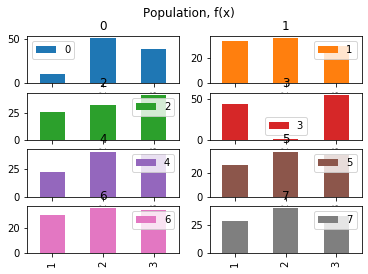

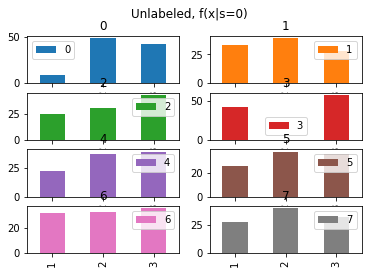

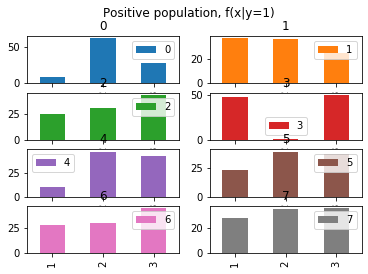

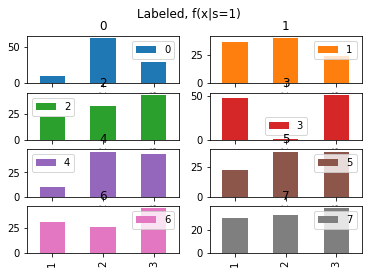

In [0]:
p450_pu = PUgenerator()
p450_pu.fit(X,y,n_L = 400, n_U = 800)
p450_pu.prevalence_
p450_pu.plot_dist()

##### single training

In [0]:
p450_pu = PUgenerator()
p450_pu.fit(X,y,case_control=False,c=0.6,n_T = 900)
p450_pu.prevalence_

0.6534031413612565

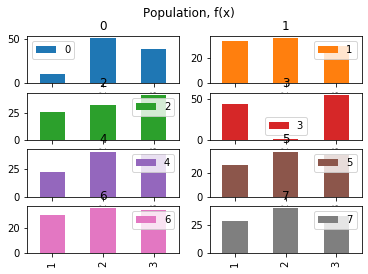

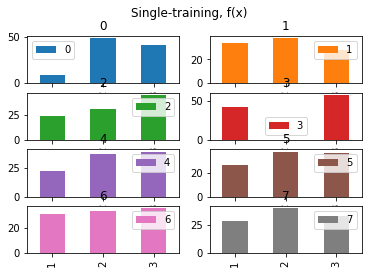

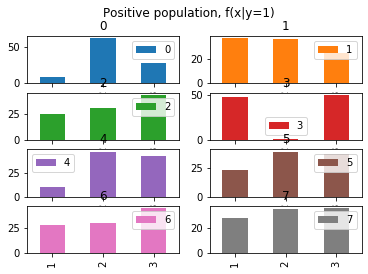

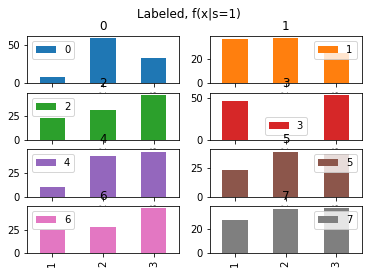

In [0]:
p450_pu.plot_dist()

#### lactamase

##### case control

In [0]:
lact_pu = PUgenerator()
lact_pu.fit(X2,y2,300,600)
lact_pu.prevalence_

0.20108695652173914

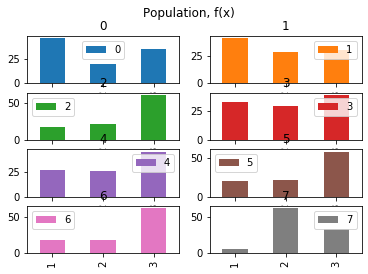

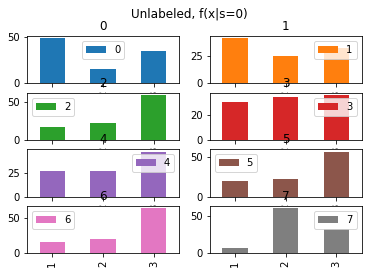

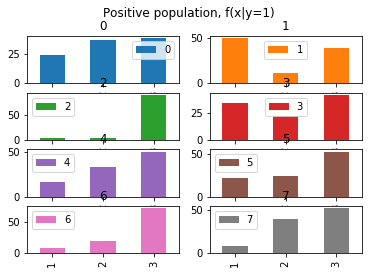

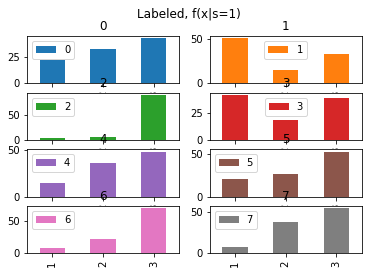

In [0]:
lact_pu.plot_dist()

##### single training

In [0]:
lact_pu = PUgenerator()
lact_pu.fit(X2,y2,case_control=False,c = 0.7, n_T = 900)
lact_pu.prevalence_

0.20108695652173914

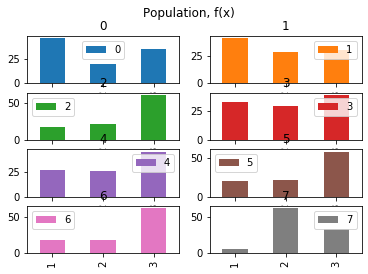

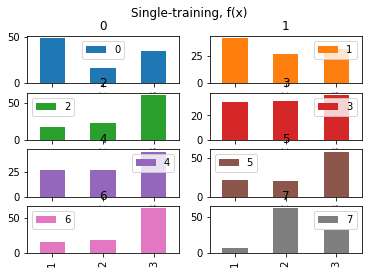

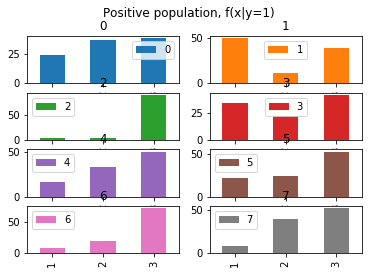

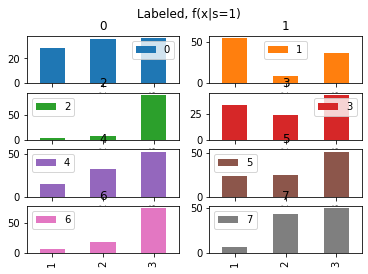

In [0]:
lact_pu.plot_dist()

# Bayesian class

## Base class

In [0]:
class Bayes_net_PU(BaseEstimator, ClassifierMixin): 
    """
    Bayesian network implementation for Postitive Unlabeled examples
    API inspired by SciKit-learn.
    """

    def predict_proba(self, X): # key prediction methods, all other prediction methods will use it first.
      raise NotImplementedError

    def predict(self, X):
      """
        Perform classification on an array of test vectors X.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
        Returns
        -------
        C : ndarray of shape (n_samples,1)
            Predicted target values for X
      """
      Prob_1 = self.predict_proba(X) 
      return(np.where(Prob_1 > 0.5, '1', '0'))

    def Conditional_log_likelihood(self,y_true,y_pred_prob): 
      """Calculate the conditional log likelihood.
      :param y_true: The true class labels. e.g ['1','1',.....'0','0']
      :param y_pred_prob: np.array shows prob of class '1' for each instance.
      :return: CLL. A scalar.
      """
      cll = []
      for i in range(len(y_pred_prob)):
        cll.append(y_pred_prob[i] if y_true[i] == '1' else 1-y_pred_prob[i] )

      cll = [np.log2(ele) for ele in cll]
      cll = np.array(cll)
      return(sum(cll))
 
    def plot_tree_structure(self,mapping = None,figsize = (5,5)):
      check_is_fitted(self)
      parent = self.parent_
      egdes = [(k,v) for v,k in parent.items() if k is not None]
      G = nx.MultiDiGraph()
      G.add_edges_from(egdes)
      #mapping=dict(zip(range(8),['b0','b1','b2','b3','b4','b5','b6','b7']))
      plt.figure(figsize=figsize)
      nx.draw_networkx(G,nx.shell_layout(G))



## PNB

In [0]:
class PNB(Bayes_net_PU):
  name = "PNB"
  def __init__(self, alpha = 1):
      self.alpha = alpha

  def fit(self,X_L, X_u, pri, M = None, case_control = True):  
    """ Implementation of a fitting function.
        Parameters
        ----------
        X_l : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input positive labeled samples.
        X_u : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input unlabeled samples.
        pri : scalar.
            The prevalence probability (p(y = 1))
        M : None
            contact matrix.    
        case_control : Bool
            Case control scenario or single-training data scenario
        Returns
        -------
        self : object
            Returns self.
      """

    X_L = check_array(X_L)
    X_u = check_array(X_u)
    if X_L.shape[1] != X_u.shape[1]:
      raise ValueError('labeled data and unlabeled data have different number of features ')
    # 1: Learned from positive examples, P(xij|1) = N_L(xij)/N_L.  N_L(xij), same for both scenario
    # 2: Learned from Unlabeled examples, N_U(xij) or from U+L N_(U+L)(xij)
    # 3: P(xi = j|c = 0), Listprob0, calculated from previous list
    n_L,p = X_L.shape
    # n_u,p = X_u.shape
    if case_control:
      X_U_or_UL = X_u
    else:
      X_U_or_UL = np.concatenate((X_L,X_u),axis = 0)
    #
    n_U_or_UT = X_U_or_UL.shape[0]
    List_count_1 = {} 
    List_prob_1 = {} # {x0:{'1': p(x0 =1|y=1), '2': p(x0 =2|y=1), 'else': }, x1:{},   ... x7:{} }
    #
    List_count_U_or_UL = {} 
    #
    List_prob_0 = {} # P(xi = j|c=0)
    K = {} # X_i_L and X_i_u contains all possible values of x_i, there are not other values, different from supervised setting.
    for i in range(p):
      x_i_L = X_L[:,i]
      x_i_U_or_UL = X_U_or_UL[:,i]
      x_i_L_counter = Counter(x_i_L) # may be not need key error
      x_i_U_or_UL_counter = Counter(x_i_U_or_UL)
      x_i_values = set(x_i_L_counter.keys()).union(x_i_U_or_UL_counter.keys()) # all possible values of x_i
      K[i] = len(list(x_i_values))
      # part 1
      x_i_L_prob = {key: (value + self.alpha) / (n_L + self.alpha * (K[i]) ) for key,value in x_i_L_counter.items()} # p(x|s=1) = p(x|y=1)
      x_i_L_prob.update({key: (0 + self.alpha) / (n_L + self.alpha * (K[i]) )  for key in list(x_i_values) if key not in list(x_i_L_counter.keys()) } )
      List_prob_1[i] = x_i_L_prob
      List_count_1[i] = x_i_L_counter
      # part 2
      List_count_U_or_UL[i] = x_i_U_or_UL_counter
      # part 3
      x_i_0_prob = {key: max([0,x_i_U_or_UL_counter[key] - x_i_L_prob[key] * pri * n_U_or_UT]) for key in list(x_i_values)} # numeritor, can be negative, make it >=0
      x_i_0_prob = {key:(self.alpha + value)/ (K[i]*self.alpha + n_U_or_UT * (1-pri) ) for key,value in x_i_0_prob.items()} # add psudo count and divied by dem
      x_i_0_prob = {key: value/(sum(np.array(list(x_i_0_prob.values()))))   for key,value in x_i_0_prob.items() } # normalize prob sum to 1, however, due to computation problem, it is not sum to 1
      List_prob_0[i] = x_i_0_prob
      # x_i_0_prob = {key: value/sum(np.array(list(x_i_0_prob.values()))) for key,value in x_i_0_prob.items()    }
    self.case_control_ = case_control
    self.is_fitted_ = True  
    self.n_features_, self.K_, self.List_count_1_,self.List_prob_1_, self.List_count_U_or_UL_, self.List_prob_0_, self.prevalence_ = p, K, List_count_1,List_prob_1,List_count_U_or_UL,List_prob_0, pri
    return self

  def predict_proba(self,X): 
    """
        Return probability estimates for the test vector X. Usually it would be X_unlabeled
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
        Returns
        -------
        P(y=1|x) : array-like of shape (n_samples, )
            Returns the probability of the samples for positive class in
            the model. 
    """
    check_is_fitted(self)
    X = check_array(X)
    Prob_1 = []
    for ins in X:
      P1 = self.prevalence_ # don't need copy, immutable
      P0 = 1 - P1
      for i in range(self.n_features_):
        P1 = P1 * (self.List_prob_1_[i][ins[i]]) 
        P0 = P0 * (self.List_prob_0_[i][ins[i]]) 
        # normalize proba
      P = P1 + P0
      P1 = P1/P; P0 = P0/P
      Prob_1.append(P1)

    Prob_1 = np.array(Prob_1) # for shap 
    return Prob_1

    

#### P450

##### case control

In [0]:
p450_cc = PUgenerator()
p450_cc.fit(X,y,n_L = 400, n_U = 800)
print(p450_cc.X_1abeled_[0:2])
pnb = PNB()
pnb.fit(p450_cc.X_1abeled_,p450_cc.X_Unlabeled_, p450_cc.prevalence_, M) # M should not make a difference
print(p450_cc.prevalence_)
print(p450_cc.y_Unlabeled_[0:20])
print(pnb.predict(p450_cc.X_Unlabeled_)[0:20])
print(pnb.predict_proba(p450_cc.X_Unlabeled_)[0:20])
print(accuracy_score(p450_cc.y_Unlabeled_,pnb.predict(p450_cc.X_Unlabeled_)) )
print(pnb.Conditional_log_likelihood(p450_cc.y_Unlabeled_,pnb.predict_proba(p450_cc.X_Unlabeled_)))
precision_score(p450_cc.y_Unlabeled_, 
         pnb.predict(p450_cc.X_Unlabeled_), 
         average='macro') 

[['2' '2' '2' '3' '2' '3' '3' '3']
 ['2' '2' '1' '3' '2' '2' '3' '1']]
0.6534031413612565
['0' '1' '1' '1' '1' '1' '1' '1' '0' '1' '0' '1' '1' '0' '0' '0' '1' '1'
 '1' '0']
['1' '1' '1' '1' '1' '1' '0' '1' '0' '1' '0' '1' '1' '0' '0' '0' '1' '1'
 '1' '1']
[0.65001118 0.73844011 0.92848805 0.79706025 0.80946546 0.82931249
 0.42534965 0.75471745 0.22337129 0.5457207  0.26103351 0.85885591
 0.76896837 0.26271417 0.4495188  0.36284015 0.51975373 0.94398005
 0.93561034 0.63974083]
0.80875
-506.50946503203005


0.7888234579893152

##### single training

In [0]:
p450_st = PUgenerator()
p450_st.fit(X,y,case_control=False,c=0.5,n_T = 1000)
print(p450_st.X_1abeled_[0:2])
pnb = PNB()
pnb.fit(p450_st.X_1abeled_,p450_st.X_Unlabeled_, p450_st.prevalence_,case_control=False, M = M) # M should not make a difference
print(p450_st.prevalence_)
print(p450_st.y_Unlabeled_[500:520])
print(pnb.predict(p450_st.X_Unlabeled_)[500:520])
print(pnb.predict_proba(p450_st.X_Unlabeled_)[500:520])
print(accuracy_score(p450_st.y_Unlabeled_,pnb.predict(p450_st.X_Unlabeled_)) )
print(pnb.Conditional_log_likelihood(p450_st.y_Unlabeled_,pnb.predict_proba(p450_st.X_Unlabeled_)))
precision_score(p450_st.y_Unlabeled_, 
         pnb.predict(p450_st.X_Unlabeled_), 
         average='macro') 

[['2' '2' '3' '1' '2' '3' '3' '3']
 ['3' '3' '1' '1' '3' '2' '3' '3']]
0.6534031413612565
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0']
['0' '0' '1' '1' '0' '0' '0' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0'
 '1' '1']
[0.28566047 0.41787818 0.80701027 0.95134311 0.4543466  0.33888775
 0.17480358 0.2723253  0.51003575 0.1709566  0.60916319 0.49016563
 0.3131639  0.50438627 0.39999673 0.23799904 0.24270609 0.20011048
 0.57518453 0.552126  ]
0.7477477477477478
-494.3450842144164


0.7746179241969635

#### lactmase

In [0]:
lact_cc = PUgenerator()
lact_cc.fit(X2,y2,300,600)
print(lact_cc.prevalence_)
pnb = PNB()
pnb.fit(lact_cc.X_1abeled_,lact_cc.X_Unlabeled_, lact_cc.prevalence_)
#lact_pu.prevalence_
print(lact_cc.y_Unlabeled_[0:20])
print(pnb.predict(lact_cc.X_Unlabeled_[0:20,:]))
print(pnb.predict_proba(lact_cc.X_Unlabeled_[0:20,:]))
print(accuracy_score(lact_cc.y_Unlabeled_,pnb.predict(lact_cc.X_Unlabeled_)) )
pnb.Conditional_log_likelihood(lact_cc.y_Unlabeled_,pnb.predict_proba(lact_cc.X_Unlabeled_))

0.20108695652173914
['0' '0' '0' '0' '1' '1' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0']
['0' '0' '0' '0' '1' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0']
[0.01559908 0.01177735 0.05795398 0.38199457 0.70268172 0.4497655
 0.0731802  0.10819952 0.53614987 0.60919263 0.22992415 0.01895352
 0.17528579 0.00523994 0.45311818 0.0166884  0.28588223 0.00198991
 0.0415223  0.06913474]
0.855


-303.6747824404417

#### Vote

In [0]:
Vote_cc = PUgenerator()
Vote_cc.fit(X11,y11,True, 100, 400,pos_label="'democrat'")
pnb = PNB()
pnb.fit(Vote_cc.X_1abeled_,Vote_cc.X_Unlabeled_,Vote_cc.prevalence_)
print(accuracy_score(Vote_cc.y_Unlabeled_ , pnb.predict(Vote_cc.X_Unlabeled_) ))
pnb.Conditional_log_likelihood(Vote_cc.y_Unlabeled_,pnb.predict_proba(Vote_cc.X_Unlabeled_))


0.9125


-286.4847247708576

#### lymph

## PTAN

In [0]:
class PTAN(Bayes_net_PU):
    name = "PTAN"
    def __init__(self, alpha = 1,starting_node = 0):
      self.starting_node = starting_node
      self.alpha = alpha
    
    def get_mutual_inf(self,X_L, X_u, pri, case_control):
      """get PU conditional mutual inf of all pairs of features, part of training
        Parameters
        ----------
        X_l : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input positive labeled samples.
        X_u : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input unlabeled samples.
        pri : scalar.
            The prevalence probability (p(y = 1))
        case_control : Bool
            Case control scenario or single-training data scenario  
        
        Returns M
        -------
        np.array matrix.
      """
      X_L = check_array(X_L)
      X_u = check_array(X_u)
      if X_L.shape[1] != X_u.shape[1]:
        raise ValueError('labeled data and unlabeled data have different number of features ')
      #
      n_L,p = X_L.shape
      # n_u,p = X_u.shape
      if case_control:
        X_U_or_UL = X_u
      else:
        X_U_or_UL = np.concatenate((X_L,X_u),axis = 0)
      #
      n_U_or_UL = X_U_or_UL.shape[0]
      M = np.zeros((p,p)) # will not change global M, since new memory assigned for this local M
      # part 1: proba that can be estimated from labeled examples. 1 P(xij,xkl|1), 2 p(xj|1), 3 p(xkl|1). P(xij,xkl|1) = N_L(xi=j,xk=l)/N_L
      # part 2: P(xij,xkl) from U, P(xij,xkl) = N_U(xij,xkl) / n_U, or P(xij,xkl) from L+U, P(xij,xkl) = N_(L+U)(xij,xkl) / N_(L+U)
      # part 3: p(xij,xkl|0),p(xij|0),p(xkl|0), same as PNB, from previous list
      #
      # List_prob_xi_xj_1 = {} # p(xij,xkl|c =1) = N_L(xij,xkl) / N_L and  p(xij|c =1) = N_L(xij)/N_L
      # List_count_xi_xj_1 = {} # N_L(xij,xkl) and N_L(xij)
      # 
      # List_prob_xi_xj_U = {} # P(xij,xkl) = N_U(xij,xkl)/n_u
      # List_count_xi_xj_U = {} # N_U(xij,xkl) and N_U(xij)
      # 
      # List_prob_xi_xj_0 = {} # p(xij,xkl|0),and p(xij|0) obtained from previous lists
      K = {}
      X_values = {}
      for i in range(p):
        x_i_L = X_L[:,i]
        x_i_U_or_UL = X_U_or_UL[:,i]
        x_i_L_counter = Counter(x_i_L) # may be not need key error
        x_i_U_or_UL_counter = Counter(x_i_U_or_UL) # N_U(xi = j) or N_(L+U)(xi =j)
        x_i_values = list(set(x_i_L_counter.keys()).union(x_i_U_or_UL_counter.keys()))
        K_i = len(list(x_i_values))
        K[i] = K_i 
        X_values[i] = x_i_values
        # part 1, p(xij|1) and N_L(xi = j)
        x_i_L_prob = {key: (value + self.alpha) / (n_L + self.alpha * (K[i]) ) for key,value in x_i_L_counter.items()} # p(xi= j|s=1) = p(x|y=1)
        x_i_L_prob.update({key: (0 + self.alpha) / (n_L + self.alpha * (K[i]) )  for key in x_i_values if key not in list(x_i_L_counter.keys()) } )
        # List_prob_xi_xj_1[(i,i)] = x_i_L_prob
        # List_count_xi_xj_1[(i,i)] = x_i_L_counter
        # part 2, learn from U, N_U(xij) ,N_U(xij,xkl) or L+U, N_(L+U)(xij), N_(L+U)(xij,xkl)
        xi_prob_U_or_UL = {key: (self.alpha + value) / (K_i*self.alpha + n_U_or_UL)   for key,value in x_i_U_or_UL_counter.items()} # P(xij)
        # List_prob_xi_xj_U[(i,i)] = xi_prob_U 
        # List_count_xi_xj_U[(i,i)] = x_i_u_counter
        # part 3, p(xi =j | y=0)
        x_i_0_prob = {key: max([0,x_i_U_or_UL_counter[key] - x_i_L_prob[key] * pri * n_U_or_UL]) for key in x_i_values} # N_U(xi =j) - N_u*p(xij, y =1) = N_U(xij,y=0)   numeritor, can be negative, make it >=0
        x_i_0_prob = {key:(self.alpha + value)/ (K[i]*self.alpha + n_U_or_UL * (1-pri) ) for key,value in x_i_0_prob.items()} # add psudo count and divied by dem
        x_i_0_prob = {key: value/(sum(np.array(list(x_i_0_prob.values()))))   for key,value in x_i_0_prob.items() } # normalize prob sum to 1, however, due to computation problem, it is not sum to 1
        # List_prob_xi_xj_0[(i,i)] = x_i_0_prob
        for j in range(i+1,p):
          x_j_L = X_L[:,j]
          x_j_U_or_UL = X_U_or_UL[:,j]
          x_j_L_counter = Counter(x_j_L) # may be not need key error
          x_j_U_or_UL_counter = Counter(x_j_U_or_UL)
          x_j_values = list(set(x_j_L_counter.keys()).union(x_j_U_or_UL_counter.keys()))
          K_j = len(list(x_j_values))
          x_j_L_prob = {key: (value + self.alpha) / (n_L + self.alpha * (K_j) ) for key,value in x_j_L_counter.items()} # p(xj= sth|s=1) = p(x|y=1)
          x_j_L_prob.update({key: (0 + self.alpha) / (n_L + self.alpha * (K_j) )  for key in x_j_values if key not in list(x_j_L_counter.keys()) } )
          # part 3, p(xi =j | y=0)
          x_j_0_prob = {key: max([0,x_j_U_or_UL_counter[key] - x_j_L_prob[key] * pri * n_U_or_UL]) for key in x_j_values} # numeritor, can be negative, make it >=0
          x_j_0_prob = {key:(self.alpha + value)/ (K_j*self.alpha + n_U_or_UL * (1-pri) ) for key,value in x_j_0_prob.items()} # add psudo count and divied by dem
          x_j_0_prob = {key: value/(sum(np.array(list(x_j_0_prob.values()))))   for key,value in x_j_0_prob.items() } # normalize prob sum to 1, however, due to computation problem, it is not sum to 1
          
          # part 1 P(xij,xkl|1) = N_L(xi=j,xk=l)/N_L and N_L(xi=j,xk=l)
          xi_xj_count_1 = {(v1,v2): X_L[(X_L[:,i] == v1) & (X_L[:,j] == v2) ].shape[0]  for v1 in x_i_values for v2 in x_j_values} # N_L(xi = j, xk = l)
          xi_xj_prob_1 = {key: (self.alpha + value) / (K_i*K_j*self.alpha + n_L)   for key,value in xi_xj_count_1.items()} # p(xij,xkl|1)
          # List_prob_xi_xj_1[(i,j)] = xi_xj_prob_1
          # List_count_xi_xj_1[(i,j)] = xi_xj_count_1
          # part 2, learn from U,  N_U(xij,xkl), or L+U
          xi_xj_count_U_or_UL = {(v1,v2): X_U_or_UL[(X_U_or_UL[:,i] == v1) & (X_U_or_UL[:,j] == v2) ].shape[0]   for v1 in x_i_values for v2 in x_j_values} # N_U(xi = j, xk = l)
          xi_xj_prob_U_or_UL = {key: (self.alpha + value) / (K_i*K_j*self.alpha + n_U_or_UL)   for key,value in xi_xj_count_U_or_UL.items()} # P(xij,xkl)
          # List_prob_xi_xj_U[(i,j)] = xi_xj_prob_U 
          # List_count_xi_xj_U[(i,j)] = xi_xj_count_U
          # part 3, p(xi = j,xk =l |0) 
          xi_xj_prob_0 = {(v1,v2): max([0, xi_xj_count_U_or_UL[(v1,v2)] - xi_xj_prob_1[(v1,v2)] * pri * n_U_or_UL ])   for v1 in x_i_values for v2 in x_j_values}# numeritor, can be negative, make it >=0
          xi_xj_prob_0 = {key: (self.alpha + value)/ (K_j*K_i*self.alpha + n_U_or_UL * (1-pri) )   for key,value in xi_xj_prob_0.items()} # add psudo count and divied by dem
          xi_xj_prob_0 = {key: value/(sum(np.array(list(xi_xj_prob_0.values()))))   for key,value in xi_xj_prob_0.items() } # normalize prob sum to 1, however, due to computation problem, it is not sum to 1
          # List_prob_xi_xj_0[(i,j)] = xi_xj_prob_0
          # M[i,j]
          M[i,j] = sum( np.array([pri* xi_xj_prob_1[(v1,v2)]* np.log( xi_xj_prob_1[(v1,v2)]/(x_i_L_prob[v1]* x_j_L_prob[v2]) ) + 
          (xi_xj_prob_U_or_UL[(v1,v2)] - pri* xi_xj_prob_1[(v1,v2)] )* np.log(xi_xj_prob_0[(v1,v2)] / ( x_i_0_prob[v1]*x_j_0_prob[v2] ) )
          for v1 in x_i_values for v2 in x_j_values] ) )
          M[j,i] = M[i,j]
          # for bug, x1, x3
          # if i == 1 and j == 3:
          #  part1 = [pri* xi_xj_prob_1[(v1,v2)]* np.log( xi_xj_prob_1[(v1,v2)]/(x_i_L_prob[v1]* x_j_L_prob[v2]) )  
          #            for v1 in x_i_values for v2 in x_j_values]
          #  part2 = [(xi_xj_prob_U[(v1,v2)] - pri* xi_xj_prob_1[(v1,v2)] )* np.log(xi_xj_prob_0[(v1,v2)] / ( x_i_0_prob[v1]*x_j_0_prob[v2] ) )
          #            for v1 in x_i_values for v2 in x_j_values]
    
      # self.n_L_,self.n_features_, self.n_U_, self.M_,self.List_prob_xi_xj_1_, self.List_count_xi_xj_1_,self.List_prob_xi_xj_U_,self.List_count_xi_xj_U_,self.List_prob_xi_xj_0_,self.K_,self.prior_  = n_L,p,n_u,M,List_prob_xi_xj_1,List_count_xi_xj_1,List_prob_xi_xj_U,List_count_xi_xj_U,List_prob_xi_xj_0,K,pri 
      # self.part1,self.part2 = part1,part2
      # return n_L,p,n_u,M,List_prob_xi_xj_1,List_count_xi_xj_1,List_prob_xi_xj_U,List_count_xi_xj_U,List_prob_xi_xj_0,K,pri 
      return n_L,p,n_U_or_UL,M,K,X_values

    def Findparent(self,X_L, X_u, pri, case_control):
      # n_L,p,n_u,M,List_prob_xi_xj_1,List_count_xi_xj_1,List_prob_xi_xj_U,List_count_xi_xj_U,List_prob_xi_xj_0,K,pri = self.get_mutual_inf(X_L, X_u, pri)
      n_L,p,n_U_or_UL,M,K,x_values = self.get_mutual_inf(X_L, X_u, pri, case_control)
      np.fill_diagonal(M,0)  
      V = range(p) # set of all nodes
      st = self.starting_node
      Vnew = [st]  # vertex that already found their parent. intitiate it with starting node. TAN randomly choose one
      parent = {st:None} # use a dict to show nodes' interdepedency
      while set(Vnew) != set(V): # when their are still nodes whose parents are unknown.
        index_i = [] # after for loop, has same length as Vnew, shows the closest node that not in Vnew with Vnew.  
        max_inf = [] # corresponding distance
        for i in range(len(Vnew)):  # can be paralelled 
          vnew = Vnew[i]
          ListToSorted = [e for e in M[:,vnew]] # 
          index = sorted(range(len(ListToSorted)),key = lambda k: ListToSorted[k],reverse = True)
          index_i.append([ele for ele in index if ele not in Vnew][0]) 
          max_inf.append(M[index_i[-1],vnew])
      
        index1 = sorted(range(len(max_inf)),key = lambda k: max_inf[k],reverse = True)[0] ## relative position, Vnew[v1,v2] index_i[v4,v5] max_inf[s1,s2] index1 is the position in those 3 list
        Vnew.append(index_i[index1]) # add in that node
        parent[index_i[index1]] = Vnew[index1] # add direction, it has to be that the new added node is child, otherwise some nodes has 2 parents which is wrong.
      
      #return parent,n_L,p,n_u,M,List_prob_xi_xj_1,List_count_xi_xj_1,List_prob_xi_xj_U,List_count_xi_xj_U,List_prob_xi_xj_0,K,pri
      return parent,n_L,p,n_U_or_UL,M,K,x_values

    
    def fit(self,X_L, X_u, pri, M = None, case_control = True):  # this is based on trainning data !!!
      """Implementation of fitting, part of training
        Parameters
        ----------
        X_l : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input positive labeled samples.
        X_u : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input unlabeled samples.
        pri : scalar.
            The prevalence probability (p(y = 1))
        M : None
          For consistency purpose, it will be ignored.
        case_control : Bool
            Case control scenario or single-training data scenario  
        
        Returns self
        -------
        self.
      """
      parent,n_L,p,n_U_or_UL,M,K,x_values = self.Findparent(X_L, X_u, pri, case_control)
      if case_control:
        X_U_or_UL = X_u
      else:
        X_U_or_UL = np.concatenate((X_L,X_u),axis = 0)
      # part 1: proba that can be estimated from labeled examples. 1 P(xij|1,xkl), 2 p(x_root|1) = N_L(x_root)/N_L,  P(xij|1,xkl) = N_L(xi=j,xk=l)/N_L(xkl)
      # part 2: learn from U, N_U(xij,xkl), and N_U(xkl)
      # part 3: p(xij|0,xkl),p(x_root|0) from previous list
      #
      List_prob_1 = {} # 1 P(xij|1,xkl), 2 p(x_root|1)  
      List_count_1 = {} # N_L(xij,xpal) and N_L(xij)
      # 
      List_count_U_or_UL = {} # N_U(xij,xkl) and N_U(xij)
      # 
      List_prob_0 = {} # p(xij|0,xkl),p(x_root|0)
      # for root node
      root_i = self.starting_node
      x_i_values = x_values[root_i]
      # part 1 
      x_i_L = X_L[:,root_i]
      x_i_L_counter = Counter(x_i_L)
      x_i_L_prob = {key: (x_i_L_counter[key]+self.alpha)/(K[root_i]*self.alpha + n_L ) for key in x_i_values}
      List_prob_1[root_i] = x_i_L_prob
      List_count_1[root_i] = x_i_L_counter
      # part 2 
      x_i_U_or_UL = X_U_or_UL[:,root_i]
      x_i_U_or_UL_counter = Counter(x_i_U_or_UL)
      List_count_U_or_UL[root_i] = x_i_U_or_UL_counter
      # part 3 
      x_i_0_prob = {key: max([0,x_i_U_or_UL_counter[key] - x_i_L_prob[key] * pri * n_U_or_UL]) for key in x_i_values} # N_U(xi =j) - N_u*p(xij, y =1) = N_U(xij,y=0)   numeritor, can be negative, make it >=0
      x_i_0_prob = {key:(self.alpha + value)/ (K[root_i]*self.alpha + n_U_or_UL * (1-pri) ) for key,value in x_i_0_prob.items()} # add psudo count and divied by dem
      x_i_0_prob = {key: value/(sum(np.array(list(x_i_0_prob.values()))))   for key,value in x_i_0_prob.items() } # normalize prob sum to 1, however, due to computation problem, it is not sum to 1
      List_prob_0[root_i] = x_i_0_prob
      #
      for i in [e for e in range(0,p) if e != root_i]:
        x_i_values = x_values[i]
        x_i_parent_Value = x_values[parent[i]]
        # part 1, P(xij|1,xkl) = N_L(xi=j,xk=l)/N_L(xkl)
        List_count_1[i] = {v2: {v1:X_L[(X_L[:,i] == v1) & (X_L[:,parent[i]] == v2)].shape[0] for v1 in x_i_values} for v2 in x_i_parent_Value} # {pva1: {'1': , '2':, '3': }, pval2:{}}
        List_prob_1[i] = {v2: {v1:(X_L[(X_L[:,i] == v1) & (X_L[:,parent[i]] == v2)].shape[0] + self.alpha)/ (X_L[(X_L[:,parent[i]] == v2)].shape[0] + self.alpha*K[i]) for v1 in x_i_values} for v2 in x_i_parent_Value}
        # part 2 
        List_count_U_or_UL[i] = {v2: {v1:X_U_or_UL[(X_U_or_UL[:,i] == v1) & (X_U_or_UL[:,parent[i]] == v2)].shape[0] for v1 in x_i_values} for v2 in x_i_parent_Value}
        # part 3 
        x_i_0_prob = {v2: {v1: List_count_U_or_UL[i][v2][v1] - List_prob_1[i][v2][v1]*pri* sum(list(List_count_U_or_UL[i][v2].values())) for v1 in x_i_values} for v2 in x_i_parent_Value}
        x_i_0_prob = {v2: {v1: max([0,x_i_0_prob[v2][v1] ]) for v1 in x_i_values} for v2 in x_i_parent_Value}
        x_i_0_prob = {v2: {v1:(x_i_0_prob[v2][v1] + self.alpha)/(self.alpha*K[i] + (1-pri)*sum(list(List_count_U_or_UL[i][v2].values())) ) for v1 in x_i_values} for v2 in x_i_parent_Value}
        x_i_0_prob = {v2: {v1:x_i_0_prob[v2][v1]/sum(list(x_i_0_prob[v2].values()))  for v1 in x_i_values} for v2 in x_i_parent_Value} # normalize 
        List_prob_0[i] = x_i_0_prob
      self.case_control_ = case_control
      self.is_fitted_ = True  
      self.parent_, self.conditional_MI_ = parent, M
      self.n_features_, self.K_, self.List_count_1_,self.List_prob_1_, self.List_count_U_or_UL_, self.List_prob_0_, self.prevalence_ = p, K, List_count_1,List_prob_1,List_count_U_or_UL,List_prob_0, pri
      return self
      
    def predict_proba(self,X):	
      check_is_fitted(self)
      X = check_array(X)
      Prob_1 = []
      root_i = self.starting_node
      for ins in X:
        P1 = self.prevalence_
        P0 = 1 - P1
        # root_i
        P1 = P1 * (self.List_prob_1_[root_i][ins[root_i]])
        P0 = P0 * (self.List_prob_0_[root_i][ins[root_i]])
        for i in [e for e in range(0,self.n_features_) if e != root_i]:
          pValue = ins[self.parent_[i]]
          P1 = P1 * (self.List_prob_1_[i][pValue][ins[i]])
          P0 = P0 * (self.List_prob_0_[i][pValue][ins[i]])
        P = P1 + P0
        P1 = P1/P; P0 = P0/P
        Prob_1.append(P1)
      #
      Prob_1 = np.array(Prob_1)
      return Prob_1


#### P450

##### case control

['0' '1' '1' '1' '1' '1' '1' '1' '0' '1']
['1' '1' '1' '1' '1' '1' '1' '1' '0' '0']
0.7725


-634.2209563252453

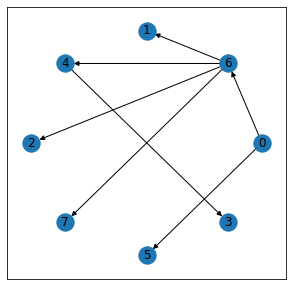

In [0]:
ptan = PTAN()
ptan.fit(p450_cc.X_1abeled_,p450_cc.X_Unlabeled_, p450_cc.prevalence_,M) # M should not make a diff
#print(ptan.conditional_MI_)
ptan.plot_tree_structure()
print(p450_cc.y_Unlabeled_[0:10])
print(ptan.predict(p450_cc.X_Unlabeled_[0:10,:]))
print(accuracy_score(p450_cc.y_Unlabeled_,ptan.predict(p450_cc.X_Unlabeled_)) )
ptan.Conditional_log_likelihood(p450_cc.y_Unlabeled_,ptan.predict_proba(p450_cc.X_Unlabeled_))

In [0]:
print(M)
ptan.conditional_MI_

[[245   9   0   3   0   2  65   8]
 [  9 218  17  17  49  10  50  17]
 [  0  17 175  16  25  13   0  46]
 [  3  17  16 194  19   0   0   3]
 [  0  49  25  19 199  10   0   3]
 [  2  10  13   0  10 249  50  74]
 [ 65  50   0   0   0  50 262  11]
 [  8  17  46   3   3  74  11 175]]


array([[0.        , 0.01750253, 0.05902111, 0.01928725, 0.02110847,
        0.05805495, 0.10407298, 0.05435265],
       [0.01750253, 0.        , 0.0131244 , 0.00326546, 0.02257366,
        0.01214181, 0.12076935, 0.02504395],
       [0.05902111, 0.0131244 , 0.        , 0.0042274 , 0.01484811,
        0.0154218 , 0.05946038, 0.05629654],
       [0.01928725, 0.00326546, 0.0042274 , 0.        , 0.04716241,
        0.00774633, 0.02637506, 0.00504523],
       [0.02110847, 0.02257366, 0.01484811, 0.04716241, 0.        ,
        0.01624872, 0.10509711, 0.05572103],
       [0.05805495, 0.01214181, 0.0154218 , 0.00774633, 0.01624872,
        0.        , 0.02731142, 0.03408082],
       [0.10407298, 0.12076935, 0.05946038, 0.02637506, 0.10509711,
        0.02731142, 0.        , 0.05936057],
       [0.05435265, 0.02504395, 0.05629654, 0.00504523, 0.05572103,
        0.03408082, 0.05936057, 0.        ]])

##### single training

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
0.7657657657657657


-528.9059753313152

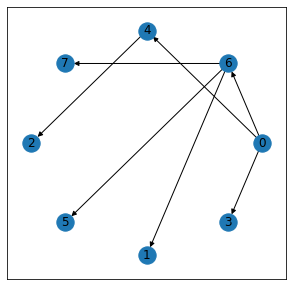

In [0]:
ptan = PTAN()
ptan.fit(p450_st.X_1abeled_,p450_st.X_Unlabeled_, p450_st.prevalence_, M, case_control=False) # M should not make a diff
ptan.plot_tree_structure()
print(p450_st.y_Unlabeled_[0:10])
print(ptan.predict(p450_st.X_Unlabeled_[0:10,:]))
print(accuracy_score(p450_st.y_Unlabeled_,ptan.predict(p450_st.X_Unlabeled_)) )
ptan.Conditional_log_likelihood(p450_st.y_Unlabeled_,ptan.predict_proba(p450_st.X_Unlabeled_))

#### lactamase

In [0]:
ptan = PTAN()
ptan.fit(lact_pu.X_1abeled_,lact_pu.X_Unlabeled_, lact_pu.prevalence_)
print(lact_pu.y_Unlabeled_[0:10])
print(ptan.predict(lact_pu.X_Unlabeled_[0:10,:]))
print(accuracy_score(lact_pu.y_Unlabeled_,ptan.predict(lact_pu.X_Unlabeled_)) )
ptan.Conditional_log_likelihood(lact_pu.y_Unlabeled_,ptan.predict_proba(lact_pu.X_Unlabeled_))

['0' '0' '0' '0' '1' '1' '0' '0' '1' '1']
['0' '0' '0' '0' '1' '1' '0' '0' '1' '1']
0.9366666666666666


-191.80307061112694

## PSTAN

In [0]:
class PSTAN(Bayes_net_PU):
    name = "PSTAN"
    def __init__(self, alpha = 1,starting_node = 0):
      self.starting_node = starting_node
      self.alpha = alpha

    def Findparent(self, M):
      M = M.copy() # to avoid change global M
      np.fill_diagonal(M,0)  
      p = int(M.shape[0]) 
      V = range(p) # set of all nodes
      st = self.starting_node
      Vnew = [st]  # vertex that already found their parent. intitiate it with starting node. TAN randomly choose one
      parent = {st:None} # use a dict to show nodes' interdepedency
      while set(Vnew) != set(V): # when their are still nodes whose parents are unknown.
        index_i = [] # after for loop, has same length as Vnew, shows the closest node that not in Vnew with Vnew.  
        max_inf = [] # corresponding distance
        for i in range(len(Vnew)):  # can be paralelled 
          vnew = Vnew[i]
          ListToSorted = [e for e in M[:,vnew]] # does not need int(e)
          index = sorted(range(len(ListToSorted)),key = lambda k: ListToSorted[k],reverse = True)
          index_i.append([ele for ele in index if ele not in Vnew][0]) 
          max_inf.append(M[index_i[-1],vnew])
      
        index1 = sorted(range(len(max_inf)),key = lambda k: max_inf[k],reverse = True)[0] ## relative position, Vnew[v1,v2] index_i[v4,v5] max_inf[s1,s2] index1 is the position in those 3 list
        Vnew.append(index_i[index1]) # add in that node
        parent[index_i[index1]] = Vnew[index1] # add direction, it has to be that the new added node is child, otherwise some nodes has 2 parents which is wrong.
      
      return parent

    
    def fit(self,X_L, X_u, pri, M, case_control = True):  # this is based on trainning data !!!
      X_L = check_array(X_L)
      X_u = check_array(X_u)
      if X_L.shape[1] != X_u.shape[1]:
        raise ValueError('labeled data and unlabeled data have different number of features ')
      n_L,p = X_L.shape
      # n_u,p = X_u.shape
      if case_control:
        X_U_or_UL = X_u
      else:
        X_U_or_UL = np.concatenate((X_L,X_u),axis = 0)
      #
      n_U_or_UL = X_U_or_UL.shape[0]
      parent = self.Findparent(M)
      # part 1: proba that can be estimated from labeled examples. 1 P(xij|1,xkl), 2 p(x_root|1) = N_L(x_root)/N_L,  P(xij|1,xkl) = N_L(xi=j,xk=l)/N_L(xkl)
      # part 2: learn from U, N_U(xij,xkl), and N_U(xkl)
      # part 3: p(xij|0,xkl),p(x_root|0) from previous list
      #
      List_prob_1 = {} # 1 P(xij|1,xkl), 2 p(x_root|1)  
      List_count_1 = {} # N_L(xij,xpal) and N_L(xij)
      # 
      List_count_U_or_UL = {} # N_U(xij,xkl) and N_U(xij)
      # 
      List_prob_0 = {} # p(xij|0,xkl),p(x_root|0)
      K = {}
      # for root node
      root_i = self.starting_node
      x_i_L = X_L[:,root_i]
      x_i_L_counter = Counter(x_i_L)
      x_i_U_or_UL = X_U_or_UL[:,root_i]
      x_i_U_or_UL_counter = Counter(x_i_U_or_UL)
      x_i_values = list(set(x_i_L_counter.keys()).union(x_i_U_or_UL_counter.keys()))
      K[root_i] = len(list(x_i_values))
      # part 1 
      x_i_L_prob = {key: (x_i_L_counter[key]+self.alpha)/(K[root_i]*self.alpha + n_L ) for key in x_i_values}
      List_prob_1[root_i] = x_i_L_prob
      List_count_1[root_i] = x_i_L_counter
      # part 2 
      List_count_U_or_UL[root_i] = x_i_U_or_UL_counter
      # part 3 
      x_i_0_prob = {key: max([0,x_i_U_or_UL_counter[key] - x_i_L_prob[key] * pri * n_U_or_UL]) for key in x_i_values} # N_U(xi =j) - N_u*p(xij, y =1) = N_U(xij,y=0)   numeritor, can be negative, make it >=0
      x_i_0_prob = {key:(self.alpha + value)/ (K[root_i]*self.alpha + n_U_or_UL * (1-pri) ) for key,value in x_i_0_prob.items()} # add psudo count and divied by dem
      x_i_0_prob = {key: value/(sum(np.array(list(x_i_0_prob.values()))))   for key,value in x_i_0_prob.items() } # normalize prob sum to 1, however, due to computation problem, it is not sum to 1
      List_prob_0[root_i] = x_i_0_prob
      #
      for i in [e for e in range(0,p) if e != root_i]:
        x_i_values = list(set(X_L[:,i]).union(X_U_or_UL[:,i]))
        x_i_parent_Value = list(set(X_L[:,parent[i]]).union(X_U_or_UL[:,parent[i] ] ) )
        K[i] = len(x_i_values)
        # part 1, P(xij|1,xkl) = N_L(xi=j,xk=l)/N_L(xkl)
        List_count_1[i] = {v2: {v1:X_L[(X_L[:,i] == v1) & (X_L[:,parent[i]] == v2)].shape[0] for v1 in x_i_values} for v2 in x_i_parent_Value} # {pva1: {'1': , '2':, '3': }, pval2:{}}
        List_prob_1[i] = {v2: {v1:(X_L[(X_L[:,i] == v1) & (X_L[:,parent[i]] == v2)].shape[0] + self.alpha)/ (X_L[(X_L[:,parent[i]] == v2)].shape[0] + self.alpha*K[i]) for v1 in x_i_values} for v2 in x_i_parent_Value}
        # part 2 
        List_count_U_or_UL[i] = {v2: {v1:X_U_or_UL[(X_U_or_UL[:,i] == v1) & (X_U_or_UL[:,parent[i]] == v2)].shape[0] for v1 in x_i_values} for v2 in x_i_parent_Value}
        # part 3 
        x_i_0_prob = {v2: {v1: List_count_U_or_UL[i][v2][v1] - List_prob_1[i][v2][v1]*pri* sum(list(List_count_U_or_UL[i][v2].values())) for v1 in x_i_values} for v2 in x_i_parent_Value}
        x_i_0_prob = {v2: {v1: max([0,x_i_0_prob[v2][v1] ]) for v1 in x_i_values} for v2 in x_i_parent_Value}
        x_i_0_prob = {v2: {v1:(x_i_0_prob[v2][v1] + self.alpha)/(self.alpha*K[i] + (1-pri)*sum(list(List_count_U_or_UL[i][v2].values())) ) for v1 in x_i_values} for v2 in x_i_parent_Value}
        x_i_0_prob = {v2: {v1:x_i_0_prob[v2][v1]/sum(list(x_i_0_prob[v2].values()))  for v1 in x_i_values} for v2 in x_i_parent_Value} # normalize 
        List_prob_0[i] = x_i_0_prob
      self.case_control_ = case_control
      self.is_fitted_ = True  
      self.parent_ = parent
      self.n_features_, self.K_, self.List_count_1_,self.List_prob_1_, self.List_count_U_, self.List_prob_0_, self.prevalence_ = p, K, List_count_1,List_prob_1,List_count_U_or_UL,List_prob_0, pri
      return self
      
    def predict_proba(self,X):	
      check_is_fitted(self)
      X = check_array(X)
      Prob_1 = []
      root_i = self.starting_node
      for ins in X:
        P1 = self.prevalence_
        P0 = 1 - P1
        # root_i
        P1 = P1 * (self.List_prob_1_[root_i][ins[root_i]])
        P0 = P0 * (self.List_prob_0_[root_i][ins[root_i]])
        for i in [e for e in range(0,self.n_features_) if e != root_i]:
          pValue = ins[self.parent_[i]]
          P1 = P1 * (self.List_prob_1_[i][pValue][ins[i]])
          P0 = P0 * (self.List_prob_0_[i][pValue][ins[i]])
        P = P1 + P0
        P1 = P1/P; P0 = P0/P
        Prob_1.append(P1)
      #
      Prob_1 = np.array(Prob_1)
      return Prob_1


#### P450

##### case control

['0' '1' '1' '1' '1' '1' '1' '1' '0' '1']
['1' '1' '1' '1' '1' '1' '1' '1' '0' '0']
0.8


-626.6783566235789

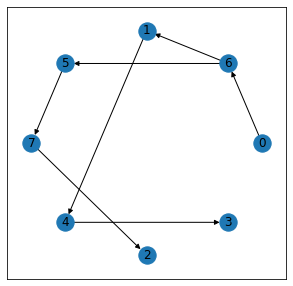

In [0]:
pstan = PSTAN()
pstan.fit(p450_cc.X_1abeled_,p450_cc.X_Unlabeled_, p450_cc.prevalence_,M)
pstan.plot_tree_structure()
print(p450_cc.y_Unlabeled_[0:10])
print(pstan.predict(p450_cc.X_Unlabeled_[0:10,:]))
print(accuracy_score(p450_cc.y_Unlabeled_,pstan.predict(p450_cc.X_Unlabeled_)) )
pstan.Conditional_log_likelihood(p450_cc.y_Unlabeled_,pstan.predict_proba(p450_cc.X_Unlabeled_))

##### single training

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
0.7777777777777778


-520.0241689627036

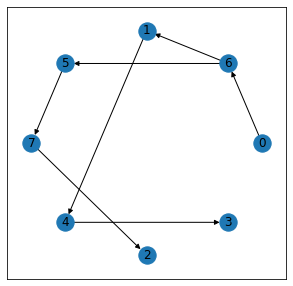

In [0]:
pstan = PSTAN()
pstan.fit(p450_st.X_1abeled_,p450_st.X_Unlabeled_, p450_st.prevalence_,M, False)
pstan.plot_tree_structure()
print(p450_st.y_Unlabeled_[0:10])
print(pstan.predict(p450_st.X_Unlabeled_[0:10,:]))
print(accuracy_score(p450_st.y_Unlabeled_,pstan.predict(p450_st.X_Unlabeled_)) )
pstan.Conditional_log_likelihood(p450_st.y_Unlabeled_,pstan.predict_proba(p450_st.X_Unlabeled_))

#### lactmase

['0' '0' '0' '0' '1' '1' '0' '0' '1' '1']
['0' '0' '0' '0' '1' '1' '0' '0' '1' '1']
0.9316666666666666


-194.28433069308144

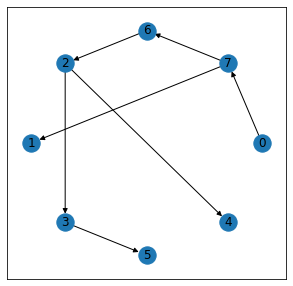

In [0]:
pstan = PSTAN()
pstan.fit(lact_pu.X_1abeled_,lact_pu.X_Unlabeled_, lact_pu.prevalence_,M2)
pstan.plot_tree_structure()
print(lact_pu.y_Unlabeled_[0:10])
print(pstan.predict(lact_pu.X_Unlabeled_[0:10,:]))
print(accuracy_score(lact_pu.y_Unlabeled_,pstan.predict(lact_pu.X_Unlabeled_)) )
pstan.Conditional_log_likelihood(lact_pu.y_Unlabeled_,pstan.predict_proba(lact_pu.X_Unlabeled_))

## PSTAN_bagging

In [0]:
class PESTAN(Bayes_net_PU):
  name = "PESTAN"
  def __init__(self,alpha = 1):
    self.alpha = alpha

  def fit(self,X_L, X_u, pri, M, case_control = True): 
    X_L = check_array(X_L)
    X_u = check_array(X_u)
    if X_L.shape[1] != X_u.shape[1]:
      raise ValueError('labeled data and unlabeled data have different number of features ')
    n_L,p = X_L.shape
    n_u,p = X_u.shape
    models = []
    ## train p PSTAN base models
    for i in range(p):
      model = PSTAN(self.alpha, starting_node= i)
      model.fit(X_L, X_u, pri, M, case_control)
      models.append(model)
    
    self.case_control_ = case_control
    self.models_, self.n_features_ = models, p
    self.is_fitted_ = True
    return self

  def predict_proba(self,X):	   
    check_is_fitted(self)
    X = check_array(X)

    Prob_1 = 0
    for model in self.models_:
      Prob_1 += model.predict_proba(X) # np array here 

    Prob_1 = Prob_1/(self.n_features_)
    return(Prob_1)

  

#### P450

##### case control

In [0]:
pestan = PESTAN()
pestan.fit(p450_cc.X_1abeled_,p450_cc.X_Unlabeled_, p450_cc.prevalence_,M)
print(p450_cc.y_Unlabeled_[0:10])
print(pestan.predict(p450_cc.X_Unlabeled_[0:10,:]))
print(accuracy_score(p450_cc.y_Unlabeled_,pestan.predict(p450_cc.X_Unlabeled_)) )
pestan.Conditional_log_likelihood(p450_cc.y_Unlabeled_,pestan.predict_proba(p450_cc.X_Unlabeled_))

['0' '1' '1' '1' '1' '1' '1' '1' '0' '1']
['1' '1' '1' '1' '1' '1' '1' '1' '0' '0']
0.80875


-594.087374364066

##### single training

In [0]:
pestan = PESTAN()
pestan.fit(p450_st.X_1abeled_,p450_st.X_Unlabeled_, p450_st.prevalence_,M,case_control=False)
print(p450_st.y_Unlabeled_[0:10])
print(pestan.predict(p450_st.X_Unlabeled_[0:10,:]))
print(accuracy_score(p450_st.y_Unlabeled_,pestan.predict(p450_st.X_Unlabeled_)) )
pestan.Conditional_log_likelihood(p450_st.y_Unlabeled_,pestan.predict_proba(p450_st.X_Unlabeled_))

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
0.7867867867867868


-473.1305550272736

## PETAN

In [0]:
class PETAN(Bayes_net_PU):
  name = "PETAN"
  def __init__(self,alpha = 1):
    self.alpha = alpha

  def fit(self,X_L, X_u, pri, M, case_control = True): 
    X_L = check_array(X_L)
    X_u = check_array(X_u)
    if X_L.shape[1] != X_u.shape[1]:
      raise ValueError('labeled data and unlabeled data have different number of features ')
    n_L,p = X_L.shape
    n_u,p = X_u.shape
    models = []
    ## train p PTAN base models
    for i in range(p):
      model = PTAN(self.alpha, starting_node= i)
      model.fit(X_L, X_u, pri,case_control)
      models.append(model)
    
    #append STAN
    model = PSTAN(self.alpha, starting_node = 0) #
    model.fit(X_L, X_u, pri, M,case_control)
    models.append(model)    
    self.models_, self.n_features_ = models, p
    self.is_fitted_ = True
    return self

  def predict_proba(self,X):	   
    check_is_fitted(self)
    X = check_array(X)

    Prob_1 = 0
    for model in self.models_:
      Prob_1 += model.predict_proba(X) # np array here 

    Prob_1 = Prob_1/(self.n_features_+ 1)
    return(Prob_1)

  

#### P450

##### case control

In [0]:
petan = PETAN()
petan.fit(p450_cc.X_1abeled_,p450_cc.X_Unlabeled_, p450_cc.prevalence_,M)
print(p450_cc.y_Unlabeled_[0:10])
print(petan.predict(p450_cc.X_Unlabeled_[0:10,:]))
print(accuracy_score(p450_cc.y_Unlabeled_,petan.predict(p450_cc.X_Unlabeled_)) )
petan.Conditional_log_likelihood(p450_cc.y_Unlabeled_,petan.predict_proba(p450_cc.X_Unlabeled_))

['0' '1' '1' '1' '1' '1' '1' '1' '0' '1']
['1' '1' '1' '1' '1' '1' '1' '1' '0' '0']
0.77875


-573.240290830865

##### single training

In [0]:
petan = PETAN()
petan.fit(p450_st.X_1abeled_,p450_st.X_Unlabeled_, p450_st.prevalence_,M, False)
print(p450_st.y_Unlabeled_[0:10])
print(petan.predict(p450_st.X_Unlabeled_[0:10,:]))
print(accuracy_score(p450_st.y_Unlabeled_,petan.predict(p450_st.X_Unlabeled_)) )
petan.Conditional_log_likelihood(p450_st.y_Unlabeled_,petan.predict_proba(p450_st.X_Unlabeled_))

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
0.7537537537537538


-638.5903815237252

#### lactamase

In [0]:
petan = PETAN()
petan.fit(lact_pu.X_1abeled_,lact_pu.X_Unlabeled_, lact_pu.prevalence_,M2)
print(lact_pu.y_Unlabeled_[0:10])
print(petan.predict(lact_pu.X_Unlabeled_[0:10,:]))
print(accuracy_score(lact_pu.y_Unlabeled_,petan.predict(lact_pu.X_Unlabeled_)) )
petan.Conditional_log_likelihood(lact_pu.y_Unlabeled_,petan.predict_proba(lact_pu.X_Unlabeled_))

['0' '0' '0' '0' '1' '1' '0' '0' '1' '1']
['0' '0' '0' '0' '1' '1' '0' '0' '1' '1']
0.92


-202.8681478820329

## Weighted NB

In [0]:
# encode
xl = p450_cc.X_1abeled_
xu = p450_cc.X_Unlabeled_
x = np.concatenate((xl,xu),axis = 0)
Y = np.concatenate( (np.repeat('1',xl.shape[0] ), np.repeat('0',xu.shape[0]) ),axis = 0)
enc = preprocessing.OneHotEncoder(drop='first').fit(X)
x = enc.transform(x).toarray()
model = LogisticRegression()
model.fit(x,Y)
pval1 = model.predict_proba(x[xl.shape[0]:])
print(pval1)
pval1.shape

[[0.74242238 0.25757762]
 [0.70622263 0.29377737]
 [0.55611369 0.44388631]
 ...
 [0.55465321 0.44534679]
 [0.83253629 0.16746371]
 [0.92629805 0.07370195]]


(800, 2)

In [0]:
# pd
xl = p450_cc.X_1abeled_
xu = p450_cc.X_Unlabeled_
x = np.concatenate((xl,xu),axis = 0)
Y = np.concatenate( (np.repeat('1',xl.shape[0] ), np.repeat('0',xu.shape[0]) ),axis = 0)
x = pd.DataFrame(x).astype('category')
model = LogisticRegression()
model.fit(x,Y)
pval2 = model.predict_proba(pd.DataFrame(xu).astype('category'))
print(pval2)
pval2.shape

[[0.73037738 0.26962262]
 [0.6645687  0.3354313 ]
 [0.58009409 0.41990591]
 ...
 [0.58268118 0.41731882]
 [0.76070357 0.23929643]
 [0.86558932 0.13441068]]


(800, 2)

In [0]:
class WNB(Bayes_net_PU):
  name = "WNB"
  def __init__(self,alpha = 1):
    self.alpha = alpha

  def fit(self,X_L, X_u, pri, M = None, case_control = True, model_class = LogisticRegression,  **kwargs):
    """ Implementation of a fitting function.
        Get fitted model that predict p(s=1|x), not related to sampling scenario
        Parameters
        ----------
        X_l : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input positive labeled samples.
        X_u : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input unlabeled samples.
        pri : scalar
            The prevalence p(y=1)
        M : None, should not be used.
            contact matrix.
        case_control : Bool
            Case control scenario or single-training data scenario, only change c_hat
            Other part are same in both scenario.
        model_class : a sklearn estimator, preferred logistic regression 
                      since it gives calibrated proba, predict p(s=1|x)
        **kwargs : 
            extra parameters for model_class

        Returns self
        -------
        self
    """
    X_L = check_array(X_L)
    X_u = check_array(X_u)
    if X_L.shape[1] != X_u.shape[1]:
      raise ValueError('labeled data and unlabeled data have different number of features ')
    n_L,p = X_L.shape
    # encode categorical features
    X = np.concatenate((X_L,X_u), axis = 0)
    enc = preprocessing.OneHotEncoder(drop='first').fit(X)
    X = enc.transform(X).toarray()
    # X = pd.DataFrame(X).astype('category') # convert to categorical, for logistic regression to work. Does not work in general, has to encode, but different proba
    y = np.concatenate( (np.repeat('1',X_L.shape[0] ), np.repeat('0',X_u.shape[0]) ),axis = 0)
    # fit model g(x) = p(s=1|x)
    model = model_class(**kwargs)
    model.fit(X,y)
    # estimate p(s=1)
    p_s_1 = X_L.shape[0]/(X_L.shape[0]+X_u.shape[0])
    # estimate c
    if case_control:
      c = p_s_1/(pri*(1-p_s_1) + p_s_1)
    else: 
      c = p_s_1/pri
    # estimate w(x)
    # w_L = np.repeat(1,X_L.shape[0])
    inx = list(model.classes_ ).index('1')
    g_U = model.predict_proba( X[n_L:] )[:,inx] # let us assume it is already calibrated ,it that already calibrated? 
    w_U = ((1-c)/c) * (g_U/(1-g_U)) # maybe need to normalize
    w_U = w_U - min(w_U) # make non-negative
    w_U = w_U / max(w_U) # 0-1
    # learning the coef_, p(xij|1), p(xij|0)
    # extreme case: w_U correctly weight positive 1 and negative 0 in U, originally p(xij|1) = N_L(xij)/N_L, 
    # List_count_1 = {} 
    List_prob_1 = {} # {x0:{'1': p(x0 =1|y=1), '2': p(x0 =2|y=1), 'else': }, x1:{},   ... x7:{} }
    #
    List_prob_0 = {} # P(xi = j|c=0)
    for i in range(p):
      x_i_L_counter = Counter(X_L[:,i])
      x_i_values = list(set(X_L[:,i]).union(set(X_u[:,i])))
      # X_u positive weight counter, X_u negative weight counter
      X_i_U_1_counter = {val: w_U[X_u[:,i] == val].sum() for val in x_i_values}
      X_i_U_0_counter = {val: (1-w_U)[X_u[:,i] == val].sum() for val in x_i_values} # w_U has to be <1
      # part 1, p(xi = j|1) = (N_L(xij) + sum_U_xij(w_U))/( n_L + sum(w_U))
      List_prob_1[i] = {key: (self.alpha + x_i_L_counter[key] + X_i_U_1_counter[key])/ (self.alpha*len(x_i_values)  + n_L + w_U.sum() ) for key in x_i_values}
      # part 2, p(xi = j|1)
      List_prob_0[i] = {key: (self.alpha + X_i_U_0_counter[key])/ ((1-w_U).sum() + self.alpha*len(x_i_values) ) for key in x_i_values}
    
    self.is_fitted_ = True
    self.case_control_ = case_control
    self.List_prob_1_, self.List_prob_0_, self.c_, self.n_features_, self.w_U_, self.prevalence_ = List_prob_1, List_prob_0, c, p, w_U, pri
    return self

  def predict_proba(self,X): 
    """
        Return probability estimates for the test vector X. Usually it would be X_unlabeled
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
        Returns
        -------
        P(y=1|x) : array-like of shape (n_samples, )
            Returns the probability of the samples for positive class in
            the model. 
    """
    check_is_fitted(self)
    X = check_array(X)
    Prob_1 = []
    for ins in X:
      P1 = self.prevalence_ # don't need copy, immutable
      P0 = 1 - P1
      for i in range(self.n_features_):
        P1 = P1 * (self.List_prob_1_[i][ins[i]]) 
        P0 = P0 * (self.List_prob_0_[i][ins[i]]) 
        # normalize proba
      P = P1 + P0
      P1 = P1/P; P0 = P0/P
      Prob_1.append(P1)

    Prob_1 = np.array(Prob_1) # for shap 
    return Prob_1

#### P450

##### case control

In [0]:
p450_cc = PUgenerator()
p450_cc.fit(X,y,n_L = 400, n_U = 800)
wnb = WNB()
#wnb.predict(p450_cc.X_Unlabeled_)[0:20]
wnb.fit(p450_cc.X_1abeled_,p450_cc.X_Unlabeled_, p450_cc.prevalence_,M) # should not make a diff
print(p450_cc.prevalence_)
print(p450_cc.y_Unlabeled_[0:20])
print(wnb.predict(p450_cc.X_Unlabeled_)[0:20])
print(wnb.predict_proba(p450_cc.X_Unlabeled_)[0:20])
print(accuracy_score(p450_cc.y_Unlabeled_,wnb.predict(p450_cc.X_Unlabeled_)) )
print(wnb.Conditional_log_likelihood(p450_cc.y_Unlabeled_,wnb.predict_proba(p450_cc.X_Unlabeled_)))
precision_score(p450_cc.y_Unlabeled_, 
         wnb.predict(p450_cc.X_Unlabeled_), 
         average='macro') 

0.6534031413612565
['0' '1' '1' '1' '1' '1' '1' '1' '0' '1' '0' '1' '1' '0' '0' '0' '1' '1'
 '1' '0']
['1' '1' '1' '1' '1' '1' '0' '1' '0' '0' '0' '1' '1' '0' '0' '0' '1' '1'
 '1' '1']
[0.52979289 0.62340035 0.79401493 0.6696645  0.69790277 0.70778451
 0.42842133 0.65460467 0.34657975 0.46232439 0.41310492 0.71794125
 0.65734188 0.40192472 0.49887068 0.4511698  0.52390806 0.80486291
 0.79111228 0.52274221]
0.79875
-575.3339927771619


0.7766816415735793

##### single training

In [0]:
p450_st = PUgenerator()
p450_st.fit(X,y,case_control=False,c=0.5,n_T = 1000)
print(p450_st.X_1abeled_[0:2])
wnb = WNB()
wnb.fit(p450_st.X_1abeled_,p450_st.X_Unlabeled_, p450_st.prevalence_,case_control=False, M = M) # should not make diff
print(p450_st.prevalence_)
print(wnb.c_)
## 
print(p450_st.y_Unlabeled_[500:520])
print(wnb.predict(p450_st.X_Unlabeled_)[500:520])
print(wnb.predict_proba(p450_st.X_Unlabeled_)[500:520])
print(accuracy_score(p450_st.y_Unlabeled_,wnb.predict(p450_st.X_Unlabeled_)) )
print(wnb.Conditional_log_likelihood(p450_st.y_Unlabeled_,wnb.predict_proba(p450_st.X_Unlabeled_)))
precision_score(p450_st.y_Unlabeled_, 
         wnb.predict(p450_st.X_Unlabeled_), 
         average='macro') 

[['2' '2' '3' '1' '2' '3' '3' '3']
 ['3' '3' '1' '1' '3' '2' '3' '3']]
0.6534031413612565
0.5111698717948718
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0']
['0' '0' '1' '1' '0' '0' '0' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0'
 '1' '1']
[0.32963543 0.47028878 0.74045563 0.89205116 0.48788591 0.35628483
 0.23302196 0.3062556  0.52682712 0.22859993 0.57547192 0.46129793
 0.35731221 0.54011232 0.41046721 0.2775208  0.30131494 0.25274105
 0.56524947 0.5330622 ]
0.7477477477477478
-509.2198503782763


0.7746179241969635

## Weighted TAN

In [0]:
class WTAN(Bayes_net_PU):
  name = "WTAN"
  def __init__(self,alpha = 1,starting_node = 0):
    self.alpha = alpha
    self.starting_node = starting_node

  def Findparent(self, M):
      M = M.copy() # to avoid change global M
      np.fill_diagonal(M,0)  
      p = int(M.shape[0]) 
      V = range(p) # set of all nodes
      st = self.starting_node
      Vnew = [st]  # vertex that already found their parent. intitiate it with starting node. TAN randomly choose one
      parent = {st:None} # use a dict to show nodes' interdepedency
      while set(Vnew) != set(V): # when their are still nodes whose parents are unknown.
        index_i = [] # after for loop, has same length as Vnew, shows the closest node that not in Vnew with Vnew.  
        max_inf = [] # corresponding distance
        for i in range(len(Vnew)):  # can be paralelled 
          vnew = Vnew[i]
          ListToSorted = [e for e in M[:,vnew]] # does not need int(e)
          index = sorted(range(len(ListToSorted)),key = lambda k: ListToSorted[k],reverse = True)
          index_i.append([ele for ele in index if ele not in Vnew][0]) 
          max_inf.append(M[index_i[-1],vnew])
      
        index1 = sorted(range(len(max_inf)),key = lambda k: max_inf[k],reverse = True)[0] ## relative position, Vnew[v1,v2] index_i[v4,v5] max_inf[s1,s2] index1 is the position in those 3 list
        Vnew.append(index_i[index1]) # add in that node
        parent[index_i[index1]] = Vnew[index1] # add direction, it has to be that the new added node is child, otherwise some nodes has 2 parents which is wrong.
      
      return parent
  
  def fit(self,X_L, X_u, pri, M,  case_control = True, model_class = LogisticRegression, **kwargs):
    """ Implementation of a fitting function.
        Get fitted model that predict p(s=1|x), not related to sampling scenario
        Parameters
        ----------
        X_l : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input positive labeled samples.
        X_u : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input unlabeled samples.
        pri : scalar
            The prevalence p(y=1)
        M : np.matrix, shpae (n_features, n_features)
            contact matrix
        case_control : Bool
            Case control scenario or single-training data scenario
        model_class : a sklearn estimator, preferred logistic regression 
                      since it gives calibrated proba, predict p(s=1|x)
        
        **kwargs : 
            extra parameters for model_class

        Returns self
        -------
        self
    """
    X_L = check_array(X_L)
    X_u = check_array(X_u)
    if X_L.shape[1] != X_u.shape[1]:
      raise ValueError('labeled data and unlabeled data have different number of features ')
    n_L,p = X_L.shape
    # parent 
    parent = self.Findparent(M)
    # fit model g(x) = p(s=1|x)
    X = np.concatenate((X_L,X_u), axis = 0)
    enc = preprocessing.OneHotEncoder(drop='first').fit(X)
    X = enc.transform(X).toarray()
    # X = pd.DataFrame(X).astype('category') # convert to categorical, for logistic regression to work
    y = np.concatenate( (np.repeat('1',X_L.shape[0] ), np.repeat('0',X_u.shape[0]) ),axis = 0)
    # 
    model = model_class(**kwargs)
    model.fit(X,y)
    # estimate p(s=1)
    p_s_1 = X_L.shape[0]/(X_L.shape[0]+X_u.shape[0])
    # estimate c
    if case_control:
      c = p_s_1/(pri*(1-p_s_1) + p_s_1)
    else: 
      c = p_s_1/pri
    # estimate w(x)
    inx = list(model.classes_ ).index('1')
    g_U = model.predict_proba( X[n_L:] )[:,inx] # let us assume it is already calibrated ,it that already calibrated? 
    w_U = ((1-c)/c) * (g_U/(1-g_U)) # maybe need to normalize
    w_U = w_U - min(w_U) # make non-negative
    w_U = w_U / max(w_U) # 0-1
    # learning the coef_, p(xij|1,xpal), p(xij|0,xpal)
    # extreme case: w_U correctly weight positive 1 and negative 0 in U, originally p(xij|1) = N_L(xij)/N_L, 
    # List_count_1 = {} 
    List_prob_1 = {} #
    #
    List_prob_0 = {} # P(xi = j|c=0)
    # for root node
    root_i = self.starting_node
    x_i_L_counter = Counter(X_L[:,root_i])
    x_i_values = list(set(X_L[:,root_i]).union(set(X_u[:,root_i])))
    X_i_U_1_counter = {val: w_U[X_u[:,root_i] == val].sum() for val in x_i_values}
    X_i_U_0_counter = {val: (1-w_U)[X_u[:,root_i] == val].sum() for val in x_i_values}
    # part 1, p(xi = j|1) = (N_L(xij) + sum_U_xij(w_U))/( n_L + sum(w_U))
    List_prob_1[root_i] = {key: (self.alpha + x_i_L_counter[key] + X_i_U_1_counter[key]) / (n_L + w_U.sum() + self.alpha*len(x_i_values) ) for key in x_i_values}
    # part 2, p(xi = j|1)
    List_prob_0[root_i] = {key: ( self.alpha + X_i_U_0_counter[key])/ ((1-w_U).sum() + self.alpha*len(x_i_values) ) for key in x_i_values}
    # for other nodes
    for i in [e for e in range(0,p) if e != root_i]:
      x_i_values = list(set(X_L[:,i]).union(X_u[:,i]))
      x_i_parent_Value = list(set(X_L[:,parent[i]]).union(X_u[:,parent[i] ] ) )
      # part 1, p(xij|1,xkl)
      List_prob_1[i] = {v2: {v1: (self.alpha + X_L[(X_L[:,i] == v1) & (X_L[:,parent[i]] == v2)].shape[0]  +  w_U[(X_u[:,i] == v1) & (X_u[:,parent[i]] == v2)].sum()   ) / 
                             ( X_L[(X_L[:,parent[i]] == v2)].shape[0] +  w_U[(X_u[:,parent[i]] == v2)].sum()+ self.alpha*len(x_i_values)  ) 
                             for v1 in x_i_values} for v2 in x_i_parent_Value}
      # part 2 , p(xij|0,xkl)
      List_prob_0[i] = {v2: {v1: (self.alpha + (1-w_U)[(X_u[:,i] == v1) & (X_u[:,parent[i]] == v2)].sum()  ) / 
                              ( (1-w_U)[(X_u[:,parent[i]] == v2)].sum() + self.alpha*len(x_i_values)  )
                             for v1 in x_i_values} for v2 in x_i_parent_Value}
    
    
    self.case_control_ = case_control
    self.is_fitted_ = True  
    self.parent_ = parent
    self.case_control_ = case_control
    self.List_prob_1_, self.List_prob_0_, self.c_, self.n_features_, self.w_U_, self.prevalence_ = List_prob_1, List_prob_0, c, p, w_U, pri
    return self

  def predict_proba(self,X): 
    """
        Return probability estimates for the test vector X. Usually it would be X_unlabeled
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
        Returns
        -------
        P(y=1|x) : array-like of shape (n_samples, )
            Returns the probability of the samples for positive class in
            the model. 
    """
    check_is_fitted(self)
    X = check_array(X)
    Prob_1 = []
    root_i = self.starting_node
    for ins in X:
      P1 = self.prevalence_ # don't need copy, immutable
      P0 = 1 - P1
      # root_i
      P1 = P1 * (self.List_prob_1_[root_i][ins[root_i]])
      P0 = P0 * (self.List_prob_0_[root_i][ins[root_i]])
      for i in [e for e in range(0,self.n_features_) if e != root_i]:
        pValue = ins[self.parent_[i]]
        P1 = P1 * (self.List_prob_1_[i][pValue][ins[i]])
        P0 = P0 * (self.List_prob_0_[i][pValue][ins[i]])
        # normalize proba
      P = P1 + P0
      P1 = P1/P; P0 = P0/P
      Prob_1.append(P1)
    #
    Prob_1 = np.array(Prob_1) # for shap 
    return Prob_1

#### P450

##### case control

In [0]:
p450_cc = PUgenerator()
p450_cc.fit(X,y,n_L = 400, n_U = 800)
wtan = WTAN()
wtan.fit(p450_cc.X_1abeled_,p450_cc.X_Unlabeled_, p450_cc.prevalence_,M)
print(p450_cc.prevalence_)
print(p450_cc.y_Unlabeled_[0:20])
print(wtan.predict(p450_cc.X_Unlabeled_)[0:20])
print(wtan.predict_proba(p450_cc.X_Unlabeled_)[0:20])
print(accuracy_score(p450_cc.y_Unlabeled_,wtan.predict(p450_cc.X_Unlabeled_)) )
print(wtan.Conditional_log_likelihood(p450_cc.y_Unlabeled_,wtan.predict_proba(p450_cc.X_Unlabeled_)))
precision_score(p450_cc.y_Unlabeled_, 
         wtan.predict(p450_cc.X_Unlabeled_), 
         average='macro') 

0.6534031413612565
['0' '1' '1' '1' '1' '1' '1' '1' '0' '1' '0' '1' '1' '0' '0' '0' '1' '1'
 '1' '0']
['1' '0' '1' '1' '1' '1' '1' '1' '0' '0' '0' '1' '1' '0' '0' '0' '1' '1'
 '1' '0']
[0.59211503 0.40469797 0.799461   0.69285399 0.70167219 0.69760156
 0.55264438 0.72921943 0.16560422 0.237073   0.20591155 0.78564216
 0.69818544 0.33776298 0.4299943  0.19926705 0.52589288 0.86213519
 0.73461387 0.3822333 ]
0.81125
-525.9874755390474


0.7869181380417336

##### single training

In [0]:
p450_st = PUgenerator()
p450_st.fit(X,y,case_control=False,c=0.5,n_T = 1000)
print(p450_st.X_1abeled_[0:2])
wtan = WTAN()
wtan.fit(p450_st.X_1abeled_,p450_st.X_Unlabeled_, p450_st.prevalence_,M,case_control=False)
print(wtan.c_)
print(p450_st.prevalence_)
print(p450_st.y_Unlabeled_[500:520])
print(wtan.predict(p450_st.X_Unlabeled_)[500:520])
print(wtan.predict_proba(p450_st.X_Unlabeled_)[500:520])
print(accuracy_score(p450_st.y_Unlabeled_,wtan.predict(p450_st.X_Unlabeled_)) )
print(wtan.Conditional_log_likelihood(p450_st.y_Unlabeled_,wtan.predict_proba(p450_st.X_Unlabeled_)))
precision_score(p450_st.y_Unlabeled_, 
         wtan.predict(p450_st.X_Unlabeled_), 
         average='macro') 

[['2' '2' '3' '1' '2' '3' '3' '3']
 ['3' '3' '1' '1' '3' '2' '3' '3']]
0.5111698717948718
0.6534031413612565
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0']
['0' '0' '1' '1' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0'
 '0' '0']
[0.4145241  0.27359797 0.71895842 0.86595421 0.29738885 0.32558588
 0.08292529 0.54322717 0.42125171 0.0546893  0.24824049 0.36200402
 0.54348518 0.45458387 0.47856707 0.2727405  0.4904456  0.10814802
 0.31379345 0.47184551]
0.7987987987987988
-453.8653186837414


0.8082655258227778

# Multiple runs 

In [0]:
def get_cv(X, y, case_control = True, nl = None, nu = None, c = None,n_T = None, random_state = 42, pos_label = '1', cls = None, M = None, runs=10, verbose = True):  
  """ Get CLL, accuracy, precision, recall under multiple runs
      Parameters
      ----------
      cls:  ___{PNB, PTAN,PSTAN, WNB, WTAN}___
            Model class
      X : {array-like, sparse matrix}, shape (n_samples, n_features)
            Feature matrix.
      Y : {array-like, sparse matrix}, shape (n_samples,)
            Target.
      M : {array-like, sparse matrix}, shape (n_features, n_features)
            Contact matrix
      nl : Scalar
            Number of labeled examples
      nu : Scalar
            Number of Unlabeled examples
      runs : Scalar
            Number of runs, all metrics are average of all runs.
      random_state : Scalar
            Random state on PU generator, make results reproducible
      Pos_label : str type
            Positive label in data. Default is '1'
      case_control : bool

      Returns
      -------
      CLL, accuracy, precision, recall of all runs.
      
  """
  X,y = check_X_y(X,y)
  Accuracy = []
  Precision = []
  Recall = []
  CLL = []
  for i in range(runs):
    # generate PU data, with different seed i*random_state
    pu_object = PUgenerator()
    pu_object.fit(X,y,case_control,nl,nu,c,n_T,random_state*(i+1),pos_label) # generate case control or single training data
    model = cls()
    model.fit(pu_object.X_1abeled_,pu_object.X_Unlabeled_, pu_object.prevalence_,M, case_control)
    Accuracy.append(accuracy_score(pu_object.y_Unlabeled_,model.predict(pu_object.X_Unlabeled_)) )
    CLL.append(model.Conditional_log_likelihood(pu_object.y_Unlabeled_,model.predict_proba(pu_object.X_Unlabeled_)) )
    Precision.append(precision_score(pu_object.y_Unlabeled_,model.predict(pu_object.X_Unlabeled_), 
         average='macro') )
    Recall.append(recall_score(pu_object.y_Unlabeled_,model.predict(pu_object.X_Unlabeled_), 
         average='macro' ) )
    if verbose:
        print("accuracy in %s -th run is %s" % (i+1,Accuracy[i]) )
        print("CLL in %s -th run is %s" % (i+1,CLL[i]))
        print("Precision in %s -th run is %s" % (i+1,Precision[i]) )
        print("Recall in %s -th run is %s" % (i+1,Recall[i]) )
        if not case_control:
          print("estimated p(s=1|y=1) in %s -th run = %s" % (i+1, model.c_ ))
        print(10*'__')
  return np.array(Accuracy), np.array(CLL), np.array(Precision),np.array(Recall)

#### german

In [195]:
# PNB case control
Accuracy, CLL, Precision,Recall = get_cv(X15,y15,True,400,1000,pos_label='1',cls = PNB)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.72
CLL in 1 -th run is -1061.8240536659778
Precision in 1 -th run is 0.6584533323624183
Recall in 1 -th run is 0.6774732892912487
____________________
accuracy in 2 -th run is 0.73
CLL in 2 -th run is -992.3760462899488
Precision in 2 -th run is 0.6901098901098901
Recall in 2 -th run is 0.7021972884525479
____________________
accuracy in 3 -th run is 0.729
CLL in 3 -th run is -1081.6147203136668
Precision in 3 -th run is 0.6897849260566024
Recall in 3 -th run is 0.6843874643874643
____________________
accuracy in 4 -th run is 0.748
CLL in 4 -th run is -955.7346771400452
Precision in 4 -th run is 0.7024716898954704
Recall in 4 -th run is 0.7133310388343945
____________________
accuracy in 5 -th run is 0.742
CLL in 5 -th run is -1017.5273697477209
Precision in 5 -th run is 0.6858832705056546
Recall in 5 -th run is 0.6986111111111111
____________________
accuracy in 6 -th run is 0.719
CLL in 6 -th run is -908.2299808609674
Precision in 6 -th run is 0.66204272713

In [0]:
# PTAN case control
Accuracy, CLL, Precision,Recall = get_cv(X15,y15,True,400,1000,pos_label='1',cls = PTAN)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

In [193]:
# WNB case control
Accuracy, CLL, Precision,Recall = get_cv(X15,y15,True,400,1000,pos_label='1',cls = WNB)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.685
CLL in 1 -th run is -880.6580952665431
Precision in 1 -th run is 0.6670995775595101
Recall in 1 -th run is 0.711514150558682
____________________
accuracy in 2 -th run is 0.703
CLL in 2 -th run is -830.7108413136013
Precision in 2 -th run is 0.6849379629517256
Recall in 2 -th run is 0.7137213651238896
____________________
accuracy in 3 -th run is 0.69
CLL in 3 -th run is -834.3542559371817
Precision in 3 -th run is 0.6733983033362865
Recall in 3 -th run is 0.6953846153846155
____________________
accuracy in 4 -th run is 0.712
CLL in 4 -th run is -837.6246129182839
Precision in 4 -th run is 0.6943995865900136
Recall in 4 -th run is 0.7301764852100423
____________________
accuracy in 5 -th run is 0.705
CLL in 5 -th run is -875.1275939250562
Precision in 5 -th run is 0.6745986814845811
Recall in 5 -th run is 0.711111111111111
____________________
accuracy in 6 -th run is 0.691
CLL in 6 -th run is -847.9316911754189
Precision in 6 -th run is 0.670744424997675

#### car

##### case control

In [182]:
# PNB case control
Accuracy, CLL, Precision,Recall = get_cv(X6,y6,True,400,1500,pos_label='acc',cls = PNB)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.8193333333333334
CLL in 1 -th run is -637.251551211401
Precision in 1 -th run is 0.7225691501924119
Recall in 1 -th run is 0.6741295965697424
____________________
accuracy in 2 -th run is 0.8033333333333333
CLL in 2 -th run is -641.6964668637833
Precision in 2 -th run is 0.717093854417798
Recall in 2 -th run is 0.6571526620757224
____________________
accuracy in 3 -th run is 0.8126666666666666
CLL in 3 -th run is -664.9618713070603
Precision in 3 -th run is 0.714781746031746
Recall in 3 -th run is 0.6740004018485031
____________________
accuracy in 4 -th run is 0.804
CLL in 4 -th run is -653.1853776889676
Precision in 4 -th run is 0.7383560389937298
Recall in 4 -th run is 0.6540509361966457
____________________
accuracy in 5 -th run is 0.8153333333333334
CLL in 5 -th run is -652.7713644180836
Precision in 5 -th run is 0.7675485538268769
Recall in 5 -th run is 0.6950515140197587
____________________
accuracy in 6 -th run is 0.8246666666666667
CLL in 6 -th run 

In [183]:
# PTAN case control
Accuracy, CLL, Precision,Recall = get_cv(X6,y6,True,400,1500,pos_label='acc',cls = PTAN)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.8833333333333333
CLL in 1 -th run is -460.1062545396701
Precision in 1 -th run is 0.8330322238528037
Recall in 1 -th run is 0.7935201715128839
____________________
accuracy in 2 -th run is 0.904
CLL in 2 -th run is -472.21790963023756
Precision in 2 -th run is 0.8843601386388673
Recall in 2 -th run is 0.8285004248196749
____________________
accuracy in 3 -th run is 0.89
CLL in 3 -th run is -450.86674699997184
Precision in 3 -th run is 0.8395173727660347
Recall in 3 -th run is 0.8208358448864778
____________________
accuracy in 4 -th run is 0.896
CLL in 4 -th run is -450.44302621419047
Precision in 4 -th run is 0.8796545667447306
Recall in 4 -th run is 0.8196823143136037
____________________
accuracy in 5 -th run is 0.9233333333333333
CLL in 5 -th run is -490.23594977760774
Precision in 5 -th run is 0.9177963564830653
Recall in 5 -th run is 0.8718524826879114
____________________
accuracy in 6 -th run is 0.924
CLL in 6 -th run is -405.2132138138382
Precision i

In [184]:
# WNB case control
Accuracy, CLL, Precision,Recall = get_cv(X6,y6,True,400,1500,pos_label='acc',cls = WNB)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.8106666666666666
CLL in 1 -th run is -645.7221798860775
Precision in 1 -th run is 0.7138398385154275
Recall in 1 -th run is 0.6027650746292991
____________________
accuracy in 2 -th run is 0.7973333333333333
CLL in 2 -th run is -648.6088011273264
Precision in 2 -th run is 0.7058176036528192
Recall in 2 -th run is 0.6416920325261334
____________________
accuracy in 3 -th run is 0.802
CLL in 3 -th run is -669.8364002977895
Precision in 3 -th run is 0.6931434872859367
Recall in 3 -th run is 0.6276270845891099
____________________
accuracy in 4 -th run is 0.7893333333333333
CLL in 4 -th run is -667.8492593852671
Precision in 4 -th run is 0.7164317507418398
Recall in 4 -th run is 0.6093116810128081
____________________
accuracy in 5 -th run is 0.8
CLL in 5 -th run is -670.5279418136719
Precision in 5 -th run is 0.7558729832494091
Recall in 5 -th run is 0.6480775315138294
____________________
accuracy in 6 -th run is 0.8153333333333334
CLL in 6 -th run is -635.8959

#### nurse

##### case control

In [185]:
# PNB case control
Accuracy, CLL, Precision,Recall = get_cv(X3,y3,True,1000,10000,pos_label='very_recom',cls = PNB)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.9812
CLL in 1 -th run is -500.92351297378895
Precision in 1 -th run is 0.9686278458221791
Recall in 1 -th run is 0.6298461538461538
____________________
accuracy in 2 -th run is 0.9799
CLL in 2 -th run is -525.8667804508142
Precision in 2 -th run is 0.9817419043047837
Recall in 2 -th run is 0.6153332806823567
____________________
accuracy in 3 -th run is 0.9808
CLL in 3 -th run is -484.8146049005423
Precision in 3 -th run is 0.9903507890240225
Recall in 3 -th run is 0.6049382716049383
____________________
accuracy in 4 -th run is 0.9809
CLL in 4 -th run is -515.5543200880469
Precision in 4 -th run is 0.9707911707927619
Recall in 4 -th run is 0.6396927233751095
____________________
accuracy in 5 -th run is 0.9815
CLL in 5 -th run is -502.04643463340943
Precision in 5 -th run is 0.9849721311038216
Recall in 5 -th run is 0.6592078717977998
____________________
accuracy in 6 -th run is 0.9801
CLL in 6 -th run is -512.940677723024
Precision in 6 -th run is 0.98222

In [186]:
# PTAN case control
Accuracy, CLL, Precision,Recall = get_cv(X3,y3,True,1000,10000,pos_label='very_recom',cls = PTAN)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.9896
CLL in 1 -th run is -288.18543661257917
Precision in 1 -th run is 0.985003634187011
Recall in 1 -th run is 0.7978461538461539
____________________
accuracy in 2 -th run is 0.9897
CLL in 2 -th run is -298.0322280990392
Precision in 2 -th run is 0.99476785532866
Recall in 2 -th run is 0.801923076923077
____________________
accuracy in 3 -th run is 0.9878
CLL in 3 -th run is -285.73409452546707
Precision in 3 -th run is 0.9938252859601174
Recall in 3 -th run is 0.7489711934156379
____________________
accuracy in 4 -th run is 0.9865
CLL in 4 -th run is -300.50059483593276
Precision in 4 -th run is 0.9893068780388978
Recall in 4 -th run is 0.7432436791837849
____________________
accuracy in 5 -th run is 0.9876
CLL in 5 -th run is -297.54092441272405
Precision in 5 -th run is 0.9937081388268723
Recall in 5 -th run is 0.7703703703703704
____________________
accuracy in 6 -th run is 0.9891
CLL in 6 -th run is -298.3197806568901
Precision in 6 -th run is 0.991268

In [187]:
# WNB case control
Accuracy, CLL, Precision,Recall = get_cv(X3,y3,True,1000,10000,pos_label='very_recom',cls = WNB)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.9803
CLL in 1 -th run is -510.9464842406171
Precision in 1 -th run is 0.9648187015254408
Recall in 1 -th run is 0.6118461538461538
____________________
accuracy in 2 -th run is 0.9789
CLL in 2 -th run is -541.3627319736208
Precision in 2 -th run is 0.9796422539263971
Recall in 2 -th run is 0.5961025114515874
____________________
accuracy in 3 -th run is 0.9799
CLL in 3 -th run is -498.26464865063144
Precision in 3 -th run is 0.9899076119702752
Recall in 3 -th run is 0.5864197530864197
____________________
accuracy in 4 -th run is 0.9789
CLL in 4 -th run is -527.7329635982516
Precision in 4 -th run is 0.9627557177335938
Recall in 4 -th run is 0.6013785471298988
____________________
accuracy in 5 -th run is 0.9798
CLL in 5 -th run is -516.6795577727677
Precision in 5 -th run is 0.9898308497784938
Recall in 5 -th run is 0.6259259259259259
____________________
accuracy in 6 -th run is 0.9785
CLL in 6 -th run is -526.9531021197241
Precision in 6 -th run is 0.97883

##### German

In [0]:
Accuracy, CLL, Precision,Recall = get_cv(PNB,X15,y15,400,900)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.7144444444444444
CLL in 1 -th run is -973.4567728199333
Precision in 1 -th run is 0.6509531972365072
Recall in 1 -th run is 0.661747971502078
____________________
accuracy in 2 -th run is 0.7088888888888889
CLL in 2 -th run is -1033.8284241163624
Precision in 2 -th run is 0.6569759273136007
Recall in 2 -th run is 0.6556925863991081
____________________
accuracy in 3 -th run is 0.7377777777777778
CLL in 3 -th run is -1116.3460478672994
Precision in 3 -th run is 0.7026955192806043
Recall in 3 -th run is 0.7054623829729911
____________________
accuracy in 4 -th run is 0.7366666666666667
CLL in 4 -th run is -886.5042120732192
Precision in 4 -th run is 0.6847898107929029
Recall in 4 -th run is 0.69609375
____________________
accuracy in 5 -th run is 0.6811111111111111
CLL in 5 -th run is -1114.9804536400786
Precision in 5 -th run is 0.6321371610845294
Recall in 5 -th run is 0.6518409686543548
____________________
accuracy in 6 -th run is 0.7088888888888889
CLL in 

In [0]:
Accuracy, CLL, Precision,Recall = get_cv(PTAN,X15,y15,400,900)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

#### Vote

##### case control

In [158]:
# PNB case control
Accuracy, CLL, Precision,Recall = get_cv(X11,y11,True,100,400,pos_label = "'democrat'",cls = PNB)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.9125
CLL in 1 -th run is -286.4847247708576
Precision in 1 -th run is 0.8998036378668871
Recall in 1 -th run is 0.9210497673532694
____________________
accuracy in 2 -th run is 0.9225
CLL in 2 -th run is -292.5798160716185
Precision in 2 -th run is 0.9149616368286445
Recall in 2 -th run is 0.9272547728768927
____________________
accuracy in 3 -th run is 0.9275
CLL in 3 -th run is -253.62293641152792
Precision in 3 -th run is 0.9186165845648604
Recall in 3 -th run is 0.9339477113753025
____________________
accuracy in 4 -th run is 0.9125
CLL in 4 -th run is -251.81936551200062
Precision in 4 -th run is 0.9050665236599504
Recall in 4 -th run is 0.9167192097519967
____________________
accuracy in 5 -th run is 0.88
CLL in 5 -th run is -400.98644306761724
Precision in 5 -th run is 0.8670548277535177
Recall in 5 -th run is 0.8911050039454709
____________________
accuracy in 6 -th run is 0.905
CLL in 6 -th run is -277.298093848693
Precision in 6 -th run is 0.8977963

In [159]:
# PTAN case control
Accuracy, CLL, Precision,Recall = get_cv(X11,y11,True,100,400,pos_label = "'democrat'",cls = PTAN)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.8775
CLL in 1 -th run is -249.30091043455403
Precision in 1 -th run is 0.8762889584057467
Recall in 1 -th run is 0.853486979946124
____________________
accuracy in 2 -th run is 0.9025
CLL in 2 -th run is -151.78184471075141
Precision in 2 -th run is 0.9052197802197802
Recall in 2 -th run is 0.8884134298880842
____________________
accuracy in 3 -th run is 0.8575
CLL in 3 -th run is -273.573464217938
Precision in 3 -th run is 0.8546122994652406
Recall in 3 -th run is 0.8386260272879598
____________________
accuracy in 4 -th run is 0.8875
CLL in 4 -th run is -148.68311391606582
Precision in 4 -th run is 0.8798839458413926
Recall in 4 -th run is 0.8869798234552333
____________________
accuracy in 5 -th run is 0.9175
CLL in 5 -th run is -213.82563028010625
Precision in 5 -th run is 0.9088286053284436
Recall in 5 -th run is 0.9125329922995293
____________________
accuracy in 6 -th run is 0.89
CLL in 6 -th run is -475.55663730643204
Precision in 6 -th run is 0.89373

In [160]:
# WNB case control
Accuracy, CLL, Precision,Recall = get_cv(X11,y11,True,100,400,pos_label = "'democrat'",cls = WNB)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.8825
CLL in 1 -th run is -290.8249338990916
Precision in 1 -th run is 0.8743593608682545
Recall in 1 -th run is 0.9054583548746973
____________________
accuracy in 2 -th run is 0.895
CLL in 2 -th run is -288.25080434373876
Precision in 2 -th run is 0.8915421391204226
Recall in 2 -th run is 0.9119157340355497
____________________
accuracy in 3 -th run is 0.8875
CLL in 3 -th run is -261.047059332746
Precision in 3 -th run is 0.8815234845443597
Recall in 3 -th run is 0.9044256496183409
____________________
accuracy in 4 -th run is 0.86
CLL in 4 -th run is -330.05531278682594
Precision in 4 -th run is 0.8623449379751901
Recall in 4 -th run is 0.8806221101303069
____________________
accuracy in 5 -th run is 0.865
CLL in 5 -th run is -405.9667893619822
Precision in 5 -th run is 0.8616635397123202
Recall in 5 -th run is 0.8933906560365704
____________________
accuracy in 6 -th run is 0.8825
CLL in 6 -th run is -272.8407390623484
Precision in 6 -th run is 0.879987492

#### lymph

##### case control

In [162]:
# PNB case -control
Accuracy, CLL, Precision,Recall = get_cv(X10,y10,True,50,100,pos_label = 'malign_lymph',cls = PNB)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.71
CLL in 1 -th run is -107.55858409906013
Precision in 1 -th run is 0.7355687606112054
Recall in 1 -th run is 0.7242424242424242
____________________
accuracy in 2 -th run is 0.86
CLL in 2 -th run is -49.900094839923305
Precision in 2 -th run is 0.8724559023066485
Recall in 2 -th run is 0.840429929723026
____________________
accuracy in 3 -th run is 0.76
CLL in 3 -th run is -119.76761767635064
Precision in 3 -th run is 0.7649077649077649
Recall in 3 -th run is 0.7494949494949494
____________________
accuracy in 4 -th run is 0.81
CLL in 4 -th run is -68.37984142994225
Precision in 4 -th run is 0.8257671290458175
Recall in 4 -th run is 0.81
____________________
accuracy in 5 -th run is 0.89
CLL in 5 -th run is -56.35737902840351
Precision in 5 -th run is 0.8952762923351159
Recall in 5 -th run is 0.8728457335014712
____________________
accuracy in 6 -th run is 0.83
CLL in 6 -th run is -88.98218088895726
Precision in 6 -th run is 0.8261678379495659
Recall in 6 -

In [163]:
# PTAN, case-control
Accuracy, CLL, Precision,Recall = get_cv(X10,y10,True,50,100,pos_label = 'malign_lymph',cls = PTAN)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.72
CLL in 1 -th run is -231.26743709739674
Precision in 1 -th run is 0.7793361383824217
Recall in 1 -th run is 0.7414141414141414
____________________
accuracy in 2 -th run is 0.84
CLL in 2 -th run is -69.15307423434132
Precision in 2 -th run is 0.8574100046750819
Recall in 2 -th run is 0.8160396858205871
____________________
accuracy in 3 -th run is 0.74
CLL in 3 -th run is -131.68636129419033
Precision in 3 -th run is 0.7434577434577434
Recall in 3 -th run is 0.7292929292929293
____________________
accuracy in 4 -th run is 0.73
CLL in 4 -th run is -112.11593939803468
Precision in 4 -th run is 0.7792617775619233
Recall in 4 -th run is 0.73
____________________
accuracy in 5 -th run is 0.83
CLL in 5 -th run is -73.46143959102413
Precision in 5 -th run is 0.8601871101871101
Recall in 5 -th run is 0.7912988650693569
____________________
accuracy in 6 -th run is 0.8
CLL in 6 -th run is -103.36386090025152
Precision in 6 -th run is 0.8115808823529411
Recall in 6 

In [164]:
# WNB, case-control
Accuracy, CLL, Precision,Recall = get_cv(X10,y10,True,50,100,pos_label = 'malign_lymph',cls = WNB)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.72
CLL in 1 -th run is -105.42121181729611
Precision in 1 -th run is 0.7793361383824217
Recall in 1 -th run is 0.7414141414141414
____________________
accuracy in 2 -th run is 0.82
CLL in 2 -th run is -53.606959492971136
Precision in 2 -th run is 0.8533739218670726
Recall in 2 -th run is 0.7879288962381149
____________________
accuracy in 3 -th run is 0.75
CLL in 3 -th run is -94.11024460184638
Precision in 3 -th run is 0.7936590436590436
Recall in 3 -th run is 0.7282828282828282
____________________
accuracy in 4 -th run is 0.75
CLL in 4 -th run is -72.37455399646103
Precision in 4 -th run is 0.7826775214834916
Recall in 4 -th run is 0.75
____________________
accuracy in 5 -th run is 0.89
CLL in 5 -th run is -51.63046455302394
Precision in 5 -th run is 0.9119047619047619
Recall in 5 -th run is 0.8635981504833964
____________________
accuracy in 6 -th run is 0.85
CLL in 6 -th run is -77.7638908368114
Precision in 6 -th run is 0.8649932157394844
Recall in 6 -t

#### P450

##### case control

In [165]:
# PNB case control
Accuracy, CLL, Precision,Recall = get_cv(X,y,case_control = True,nl = 400,nu = 800, cls = PNB, M =M)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.80875
CLL in 1 -th run is -506.50946503203005
Precision in 1 -th run is 0.7888234579893152
Recall in 1 -th run is 0.7684535355316522
____________________
accuracy in 2 -th run is 0.79
CLL in 2 -th run is -533.3013457402418
Precision in 2 -th run is 0.7899110076233613
Recall in 2 -th run is 0.7450922230611585
____________________
accuracy in 3 -th run is 0.775
CLL in 3 -th run is -547.9370120730064
Precision in 3 -th run is 0.7565759096517322
Recall in 3 -th run is 0.7331916152422622
____________________
accuracy in 4 -th run is 0.79625
CLL in 4 -th run is -522.01794097076
Precision in 4 -th run is 0.7833857203413553
Recall in 4 -th run is 0.7467134581105169
____________________
accuracy in 5 -th run is 0.7875
CLL in 5 -th run is -550.1472735731867
Precision in 5 -th run is 0.7677075399847677
Recall in 5 -th run is 0.7294191095093504
____________________
accuracy in 6 -th run is 0.74375
CLL in 6 -th run is -617.9985006925897
Precision in 6 -th run is 0.7229214

In [166]:
# PTAN # case control
Accuracy, CLL, Precision,Recall = get_cv(X,y,case_control = True,nl = 400,nu = 800, cls = PTAN, M =M)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.7725
CLL in 1 -th run is -634.2209563252453
Precision in 1 -th run is 0.7535484314686337
Recall in 1 -th run is 0.7080232763181097
____________________
accuracy in 2 -th run is 0.79875
CLL in 2 -th run is -636.072200758893
Precision in 2 -th run is 0.7972076069976918
Recall in 2 -th run is 0.7578066012296408
____________________
accuracy in 3 -th run is 0.80375
CLL in 3 -th run is -578.2234682884513
Precision in 3 -th run is 0.8021943676799579
Recall in 3 -th run is 0.7527672865113271
____________________
accuracy in 4 -th run is 0.8075
CLL in 4 -th run is -604.1147375712991
Precision in 4 -th run is 0.8063522847130074
Recall in 4 -th run is 0.7507798573975044
____________________
accuracy in 5 -th run is 0.77
CLL in 5 -th run is -661.454882152488
Precision in 5 -th run is 0.7424913361571044
Recall in 5 -th run is 0.7144498992593433
____________________
accuracy in 6 -th run is 0.7475
CLL in 6 -th run is -765.370943539199
Precision in 6 -th run is 0.727971646

In [167]:
# PSTAN case-control
Accuracy, CLL, Precision,Recall = get_cv(X,y,case_control = True,nl = 400,nu = 800, cls = PSTAN , M =M)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.8
CLL in 1 -th run is -626.6783566235789
Precision in 1 -th run is 0.7953875176023594
Recall in 1 -th run is 0.735249515076706
____________________
accuracy in 2 -th run is 0.795
CLL in 2 -th run is -574.0561120706589
Precision in 2 -th run is 0.7863532687579609
Recall in 2 -th run is 0.7606784597130838
____________________
accuracy in 3 -th run is 0.83375
CLL in 3 -th run is -528.859118205624
Precision in 3 -th run is 0.8288710907704042
Recall in 3 -th run is 0.7966104609965672
____________________
accuracy in 4 -th run is 0.82125
CLL in 4 -th run is -500.97881074093243
Precision in 4 -th run is 0.8100460517717247
Recall in 4 -th run is 0.780804367201426
____________________
accuracy in 5 -th run is 0.82
CLL in 5 -th run is -581.471831879099
Precision in 5 -th run is 0.8066679501989475
Recall in 5 -th run is 0.7712051987854366
____________________
accuracy in 6 -th run is 0.76875
CLL in 6 -th run is -722.5961859571175
Precision in 6 -th run is 0.776718263960

In [168]:
# PESTAN case-control
Accuracy, CLL, Precision,Recall = get_cv(X,y,case_control = True,nl = 400,nu = 800, cls = PESTAN , M =M)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.80875
CLL in 1 -th run is -594.087374364066
Precision in 1 -th run is 0.8060750936919898
Recall in 1 -th run is 0.7465526362193616
____________________
accuracy in 2 -th run is 0.79375
CLL in 2 -th run is -584.518470903922
Precision in 2 -th run is 0.7902415458937198
Recall in 2 -th run is 0.7531415165570057
____________________
accuracy in 3 -th run is 0.82625
CLL in 3 -th run is -536.2066861814662
Precision in 3 -th run is 0.8204668138878666
Recall in 3 -th run is 0.78752261641866
____________________
accuracy in 4 -th run is 0.81625
CLL in 4 -th run is -486.03147240458253
Precision in 4 -th run is 0.8038955647300321
Recall in 4 -th run is 0.7752339572192514
____________________
accuracy in 5 -th run is 0.83875
CLL in 5 -th run is -522.4173394620217
Precision in 5 -th run is 0.8372185386165436
Recall in 5 -th run is 0.7861247481483583
____________________
accuracy in 6 -th run is 0.7475
CLL in 6 -th run is -701.1659636442284
Precision in 6 -th run is 0.7338

In [169]:
# PETAN case-control
Accuracy, CLL, Precision,Recall = get_cv(X,y,case_control = True,nl = 400,nu = 800, cls = PETAN , M =M)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.77875
CLL in 1 -th run is -573.240290830865
Precision in 1 -th run is 0.7591666666666667
Recall in 1 -th run is 0.7193616646094163
____________________
accuracy in 2 -th run is 0.8
CLL in 2 -th run is -567.5291808626503
Precision in 2 -th run is 0.806658821221928
Recall in 2 -th run is 0.75296623880919
____________________
accuracy in 3 -th run is 0.79375
CLL in 3 -th run is -549.2564949039815
Precision in 3 -th run is 0.7948190789473684
Recall in 3 -th run is 0.7367655253544672
____________________
accuracy in 4 -th run is 0.81125
CLL in 4 -th run is -533.4915751957463
Precision in 4 -th run is 0.8120075799609052
Recall in 4 -th run is 0.7545120320855614
____________________
accuracy in 5 -th run is 0.785
CLL in 5 -th run is -574.450462222648
Precision in 5 -th run is 0.7662859845925125
Recall in 5 -th run is 0.7236442577825704
____________________
accuracy in 6 -th run is 0.74875
CLL in 6 -th run is -669.3839126782561
Precision in 6 -th run is 0.72967993586

In [170]:
# WNB case-control
Accuracy, CLL, Precision,Recall = get_cv(X,y,case_control = True,nl = 400,nu = 800, cls = WNB ,M =M)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.79875
CLL in 1 -th run is -575.3339927771619
Precision in 1 -th run is 0.7766816415735793
Recall in 1 -th run is 0.7571680479633222
____________________
accuracy in 2 -th run is 0.7875
CLL in 2 -th run is -575.881225197315
Precision in 2 -th run is 0.7858954845256215
Recall in 2 -th run is 0.7431237191241507
____________________
accuracy in 3 -th run is 0.775
CLL in 3 -th run is -583.622922380615
Precision in 3 -th run is 0.7552015677075988
Recall in 3 -th run is 0.736521302430534
____________________
accuracy in 4 -th run is 0.81
CLL in 4 -th run is -558.0226770990537
Precision in 4 -th run is 0.799847792998478
Recall in 4 -th run is 0.7633689839572193
____________________
accuracy in 5 -th run is 0.7825
CLL in 5 -th run is -587.2475974753786
Precision in 5 -th run is 0.7610848041325872
Recall in 5 -th run is 0.7237435795567411
____________________
accuracy in 6 -th run is 0.7375
CLL in 6 -th run is -608.1657423441108
Precision in 6 -th run is 0.715175861045

In [171]:
# WTAN case-control
Accuracy, CLL, Precision,Recall = get_cv(X,y,case_control = True,nl = 400,nu = 800, cls = WTAN ,M =M)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.81125
CLL in 1 -th run is -525.9874755390474
Precision in 1 -th run is 0.7869181380417336
Recall in 1 -th run is 0.7874625286545582
____________________
accuracy in 2 -th run is 0.8325
CLL in 2 -th run is -525.11112073912
Precision in 2 -th run is 0.819329090712976
Recall in 2 -th run is 0.819329090712976
____________________
accuracy in 3 -th run is 0.8175
CLL in 3 -th run is -537.9607455896854
Precision in 3 -th run is 0.7988257889017231
Recall in 3 -th run is 0.800782889260383
____________________
accuracy in 4 -th run is 0.835
CLL in 4 -th run is -512.6120289392848
Precision in 4 -th run is 0.8200000000000001
Recall in 4 -th run is 0.8063725490196079
____________________
accuracy in 5 -th run is 0.8225
CLL in 5 -th run is -548.9471476996646
Precision in 5 -th run is 0.8006515805230254
Recall in 5 -th run is 0.7906864553477682
____________________
accuracy in 6 -th run is 0.77
CLL in 6 -th run is -564.9547723843982
Precision in 6 -th run is 0.7496006529063

#### lactamase

##### case-control

In [172]:
# PNB case control
Accuracy, CLL, Precision,Recall = get_cv(X2,y2,case_control = True,nl = 400,nu = 800, cls = PNB, M =M2)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.86375
CLL in 1 -th run is -388.6757106253755
Precision in 1 -th run is 0.7976974829714031
Recall in 1 -th run is 0.7169834307992202
____________________
accuracy in 2 -th run is 0.85
CLL in 2 -th run is -402.8202302300091
Precision in 2 -th run is 0.78992628992629
Recall in 2 -th run is 0.6581384015594541
____________________
accuracy in 3 -th run is 0.8225
CLL in 3 -th run is -412.99012994785187
Precision in 3 -th run is 0.7322984141165959
Recall in 3 -th run is 0.621875
____________________
accuracy in 4 -th run is 0.86875
CLL in 4 -th run is -371.38861606169297
Precision in 4 -th run is 0.8231218195949612
Recall in 4 -th run is 0.7193223443223443
____________________
accuracy in 5 -th run is 0.8525
CLL in 5 -th run is -392.0947519225232
Precision in 5 -th run is 0.8180555555555555
Recall in 5 -th run is 0.6772514416192577
____________________
accuracy in 6 -th run is 0.85375
CLL in 6 -th run is -360.58270878616287
Precision in 6 -th run is 0.76317470456723

In [173]:
# PTAN case control
Accuracy, CLL, Precision,Recall = get_cv(X2,y2,case_control = True,nl = 400,nu = 800, cls = PTAN, M =M2)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.9425
CLL in 1 -th run is -239.48196064729842
Precision in 1 -th run is 0.9237371700058268
Recall in 1 -th run is 0.8839343729694606
____________________
accuracy in 2 -th run is 0.9375
CLL in 2 -th run is -261.22299269376595
Precision in 2 -th run is 0.9216889880952381
Recall in 2 -th run is 0.8682586094866797
____________________
accuracy in 3 -th run is 0.92375
CLL in 3 -th run is -262.25266124031333
Precision in 3 -th run is 0.8916820215846275
Recall in 3 -th run is 0.86328125
____________________
accuracy in 4 -th run is 0.925
CLL in 4 -th run is -238.9791247311887
Precision in 4 -th run is 0.9070934011586831
Recall in 4 -th run is 0.8441232680363115
____________________
accuracy in 5 -th run is 0.925
CLL in 5 -th run is -250.5060200870478
Precision in 5 -th run is 0.9010822510822512
Recall in 5 -th run is 0.8585665079917953
____________________
accuracy in 6 -th run is 0.935
CLL in 6 -th run is -224.4235865927679
Precision in 6 -th run is 0.8965272856130

In [174]:
# PSTAN case control
Accuracy, CLL, Precision,Recall = get_cv(X2,y2,case_control = True,nl = 400,nu = 800, cls = PSTAN, M =M2)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.92375
CLL in 1 -th run is -251.76760527641693
Precision in 1 -th run is 0.8856811676226342
Recall in 1 -th run is 0.859770955165692
____________________
accuracy in 2 -th run is 0.91875
CLL in 2 -th run is -266.5936246309075
Precision in 2 -th run is 0.8739396068163191
Recall in 2 -th run is 0.8566845354126056
____________________
accuracy in 3 -th run is 0.91625
CLL in 3 -th run is -271.3755777710612
Precision in 3 -th run is 0.8733672758129527
Recall in 3 -th run is 0.8609375
____________________
accuracy in 4 -th run is 0.93125
CLL in 4 -th run is -241.34368925927302
Precision in 4 -th run is 0.9044232087854678
Recall in 4 -th run is 0.8698638318203535
____________________
accuracy in 5 -th run is 0.89875
CLL in 5 -th run is -264.817233942393
Precision in 5 -th run is 0.8522505922611214
Recall in 5 -th run is 0.8236870621928093
____________________
accuracy in 6 -th run is 0.93375
CLL in 6 -th run is -233.6317734289463
Precision in 6 -th run is 0.881691264

In [175]:
# PESATN case-control
Accuracy, CLL, Precision,Recall = get_cv(X2,y2,case_control = True,nl = 400,nu = 800, cls = PESTAN, M =M2)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.9175
CLL in 1 -th run is -276.5076874112495
Precision in 1 -th run is 0.8684297794727243
Recall in 1 -th run is 0.8609486679662118
____________________
accuracy in 2 -th run is 0.90875
CLL in 2 -th run is -276.00906623530835
Precision in 2 -th run is 0.8502875718929732
Recall in 2 -th run is 0.8555474333983106
____________________
accuracy in 3 -th run is 0.9
CLL in 3 -th run is -275.23358118552153
Precision in 3 -th run is 0.838584701259594
Recall in 3 -th run is 0.86015625
____________________
accuracy in 4 -th run is 0.91875
CLL in 4 -th run is -250.82581235600924
Precision in 4 -th run is 0.8794105437941054
Recall in 4 -th run is 0.8548136645962733
____________________
accuracy in 5 -th run is 0.91125
CLL in 5 -th run is -251.10843397044235
Precision in 5 -th run is 0.8601611941992792
Recall in 5 -th run is 0.8683675838848253
____________________
accuracy in 6 -th run is 0.91125
CLL in 6 -th run is -271.5404926640116
Precision in 6 -th run is 0.8392370698

In [176]:
# PETAN case control
Accuracy, CLL, Precision,Recall = get_cv(X2,y2,case_control = True,nl = 400,nu = 800, cls = PETAN, M =M2)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.9175
CLL in 1 -th run is -249.15366933240844
Precision in 1 -th run is 0.8607724757150044
Recall in 1 -th run is 0.8785737491877843
____________________
accuracy in 2 -th run is 0.93
CLL in 2 -th run is -262.7466650951598
Precision in 2 -th run is 0.9013266998341625
Recall in 2 -th run is 0.86362897985705
____________________
accuracy in 3 -th run is 0.92375
CLL in 3 -th run is -257.94196851932963
Precision in 3 -th run is 0.8854895899627239
Recall in 3 -th run is 0.8726562499999999
____________________
accuracy in 4 -th run is 0.93875
CLL in 4 -th run is -233.3138800201375
Precision in 4 -th run is 0.9218323586744639
Recall in 4 -th run is 0.8769509476031215
____________________
accuracy in 5 -th run is 0.92
CLL in 5 -th run is -237.92340031849804
Precision in 5 -th run is 0.8856325650804178
Recall in 5 -th run is 0.8600371531406015
____________________
accuracy in 6 -th run is 0.93125
CLL in 6 -th run is -233.98616896723053
Precision in 6 -th run is 0.87886

In [177]:
# WNB case control
Accuracy, CLL, Precision,Recall = get_cv(X2,y2,case_control = True,nl = 400,nu = 800, cls = WNB, M =M2)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.8375
CLL in 1 -th run is -395.70604514267654
Precision in 1 -th run is 0.7788975730152201
Recall in 1 -th run is 0.6101364522417154
____________________
accuracy in 2 -th run is 0.835
CLL in 2 -th run is -408.10650692460854
Precision in 2 -th run is 0.7842712842712842
Recall in 2 -th run is 0.5960038986354776
____________________
accuracy in 3 -th run is 0.80375
CLL in 3 -th run is -416.3385213447226
Precision in 3 -th run is 0.6756673299938243
Recall in 3 -th run is 0.5750000000000001
____________________
accuracy in 4 -th run is 0.845
CLL in 4 -th run is -383.1622503010725
Precision in 4 -th run is 0.8224108827325985
Recall in 4 -th run is 0.6292801401497055
____________________
accuracy in 5 -th run is 0.835
CLL in 5 -th run is -406.38512185259367
Precision in 5 -th run is 0.8133484162895928
Recall in 5 -th run is 0.6179225202213707
____________________
accuracy in 6 -th run is 0.83875
CLL in 6 -th run is -368.03417090205835
Precision in 6 -th run is 0.735

In [178]:
# WTAN case control
Accuracy, CLL, Precision,Recall = get_cv(X2,y2,case_control = True,nl = 400,nu = 800, cls = WTAN, M =M2)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))

accuracy in 1 -th run is 0.91125
CLL in 1 -th run is -275.32942897789104
Precision in 1 -th run is 0.9103229153157826
Recall in 1 -th run is 0.7891081871345029
____________________
accuracy in 2 -th run is 0.89125
CLL in 2 -th run is -288.2658933799701
Precision in 2 -th run is 0.9002177004512018
Recall in 2 -th run is 0.7314408706952567
____________________
accuracy in 3 -th run is 0.90375
CLL in 3 -th run is -293.7696772800992
Precision in 3 -th run is 0.8834265620502809
Recall in 3 -th run is 0.79921875
____________________
accuracy in 4 -th run is 0.91625
CLL in 4 -th run is -264.74721046645385
Precision in 4 -th run is 0.9266632671850876
Recall in 4 -th run is 0.7998287943940118
____________________
accuracy in 5 -th run is 0.895
CLL in 5 -th run is -273.9926135012131
Precision in 5 -th run is 0.8998579545454546
Recall in 5 -th run is 0.7614652269824684
____________________
accuracy in 6 -th run is 0.9025
CLL in 6 -th run is -260.21535372047714
Precision in 6 -th run is 0.90247299